In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import os
import numpy as np
from scipy.optimize import curve_fit

import decomposition
import potential_data
import scaler
import plots
import potential_analyze
import fit

pd.options.mode.chained_assignment = None

      smearing_step  r/a  copy   T     field       err      beta  \
0                 1    1     0   1  0.884334  0.000003  beta=6.0   
1                 1    1     0   2  0.819558  0.000006  beta=6.0   
2                 1    1     0   3  0.764224  0.000009  beta=6.0   
3                 1    1     0   4  0.713692  0.000012  beta=6.0   
4                 1    1     0   5  0.666809  0.000014  beta=6.0   
...             ...  ...   ...  ..       ...       ...       ...   
1915             22   12     0   6 -0.000002  0.000004  beta=6.0   
1916             22   12     0   7  0.000003  0.000004  beta=6.0   
1917             22   12     0   8 -0.000002  0.000004  beta=6.0   
1918             22   12     0   9 -0.000007  0.000004  beta=6.0   
1919             22   12     0  10 -0.000002  0.000004  beta=6.0   

     potential_type  smearing  
0          original         1  
1          original         1  
2          original         1  
3          original         1  
4          original    

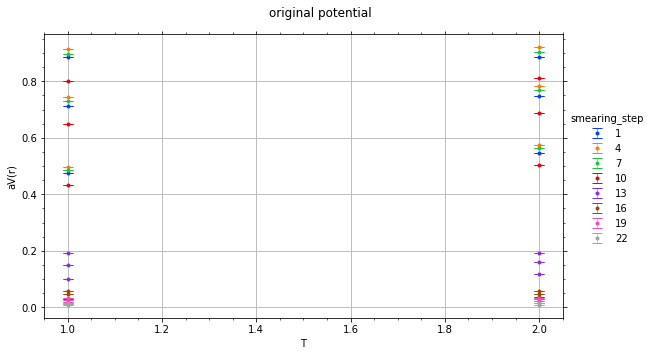

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=1


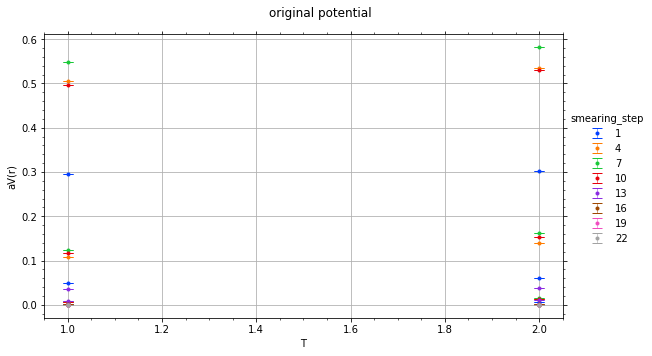

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=6


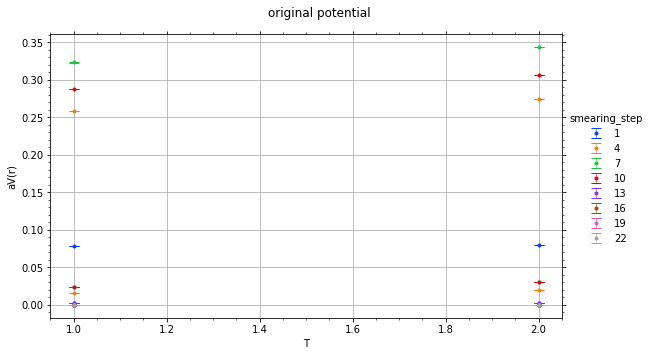

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=12


In [42]:
show_plot = True
coordinate = 'smearing'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=0.75_0.6_0.3_APE_alpha=0.8/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}},
          {'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.8/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 2}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
data = data[data['T'].isin([1, 4, 10])]
data = data[data['r/a'].isin([1, 6, 12])]
# data = data[data['smearing_step'] == 10]
print(data[data['smearing_step'] == 22])
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'field', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

      smearing_step  r/a  copy   T         field       err      beta  \
0                 1    1     0   1  8.656328e-01  0.000004  beta=6.0   
1                 1    1     0   2  8.075017e-01  0.000006  beta=6.0   
2                 1    1     0   3  7.633126e-01  0.000009  beta=6.0   
3                 1    1     0   4  7.236665e-01  0.000012  beta=6.0   
4                 1    1     0   5  6.866233e-01  0.000014  beta=6.0   
...             ...  ...   ...  ..           ...       ...       ...   
4795             22   12     0   6 -2.325593e-07  0.000003  beta=6.0   
4796             22   12     0   7 -1.620863e-06  0.000003  beta=6.0   
4797             22   12     0   8 -1.214097e-07  0.000003  beta=6.0   
4798             22   12     0   9  5.449185e-07  0.000003  beta=6.0   
4799             22   12     0  10  9.418095e-07  0.000003  beta=6.0   

     potential_type  smearing  
0          original       0.2  
1          original       0.2  
2          original       0.2  
3      

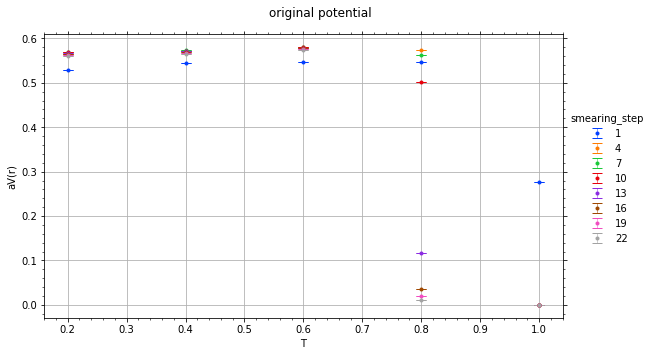

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=1


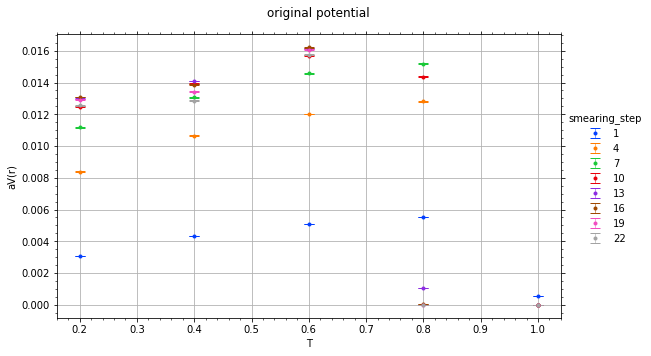

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=6


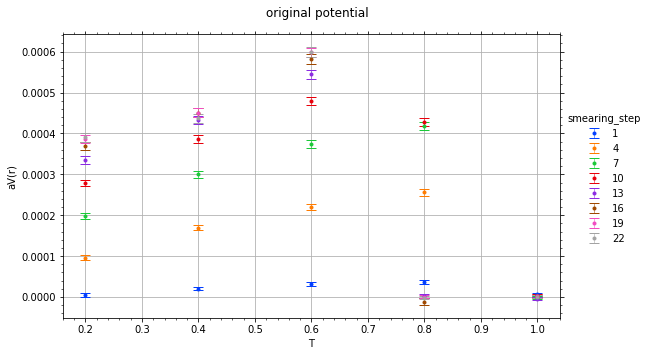

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=12


In [37]:
show_plot = True
coordinate = 'smearing'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.2/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 0.2}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}},
          {'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.4/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 0.4}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}},
          {'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.6/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 0.6}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}},
          {'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.8/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 0.8}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}},
          {'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=1/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
data = data[data['T'].isin([10])]
data = data[data['r/a'].isin([1, 6, 12])]
# data = data[data['smearing'] == 0.4]
print(data[data['smearing_step'] == 22])
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'field', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

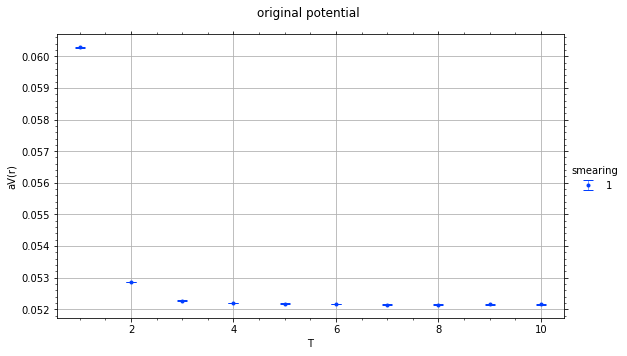

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=1


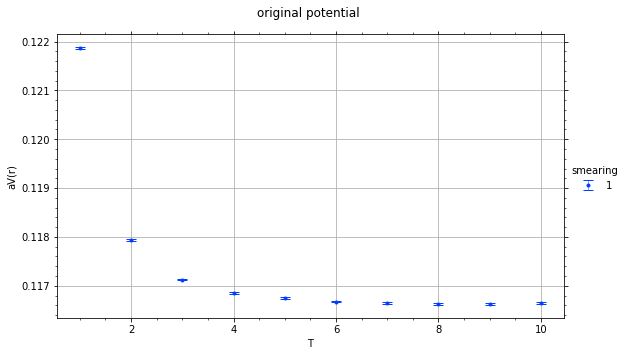

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=2


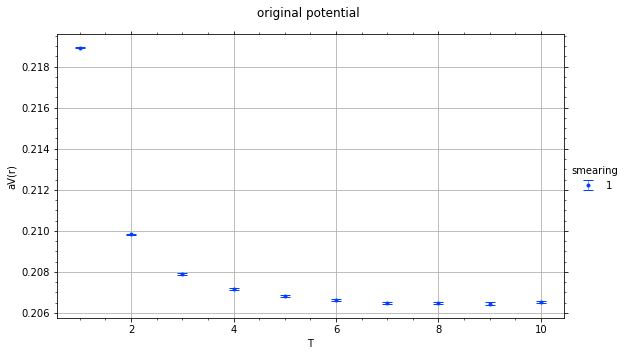

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=3


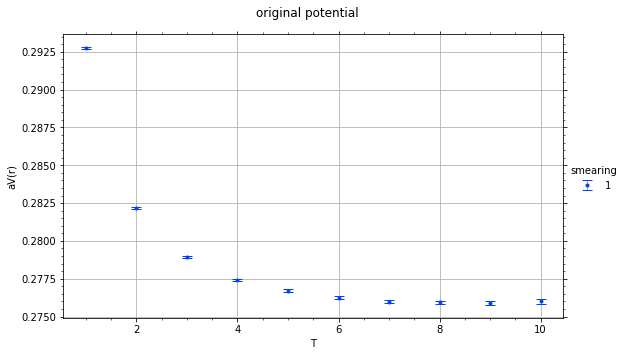

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=4


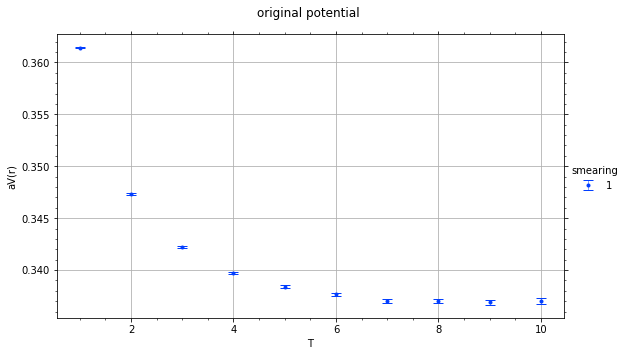

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=5


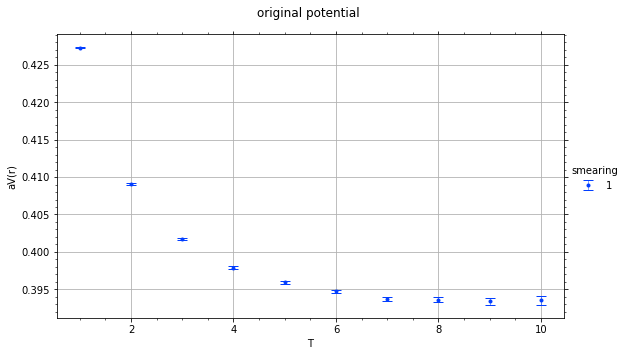

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=6


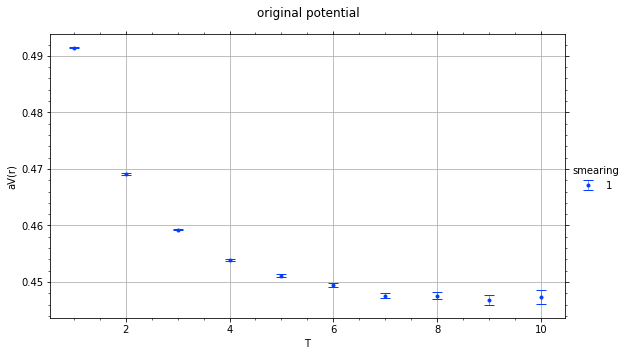

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=7


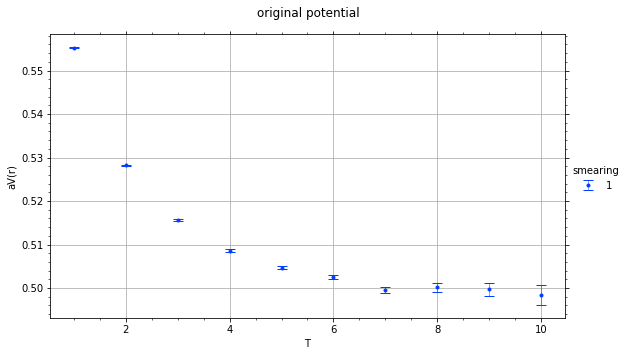

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=8


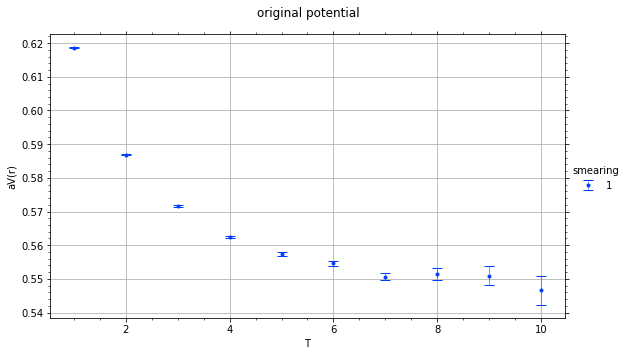

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=9


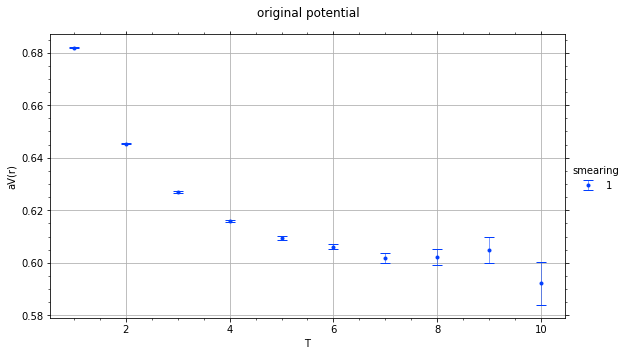

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=10


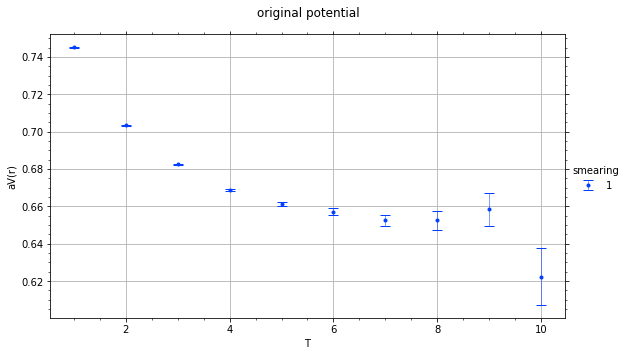

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=11


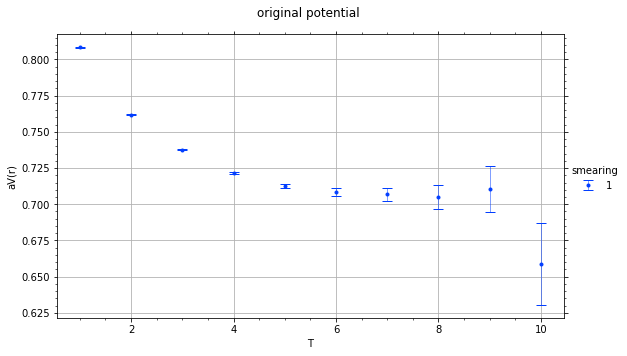

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=12


In [48]:
show_plot = True
coordinate = 'T'
hue = 'smearing'
groupby = []
# paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=0.75_0.6_0.3_APE_alpha=0.8/smearing/potential_original.csv',
#           'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}},
#           {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.8/smearing/potential_original.csv',
#           'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 2}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.8/smearing/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
data = data[data['smearing_step'] == 10]
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

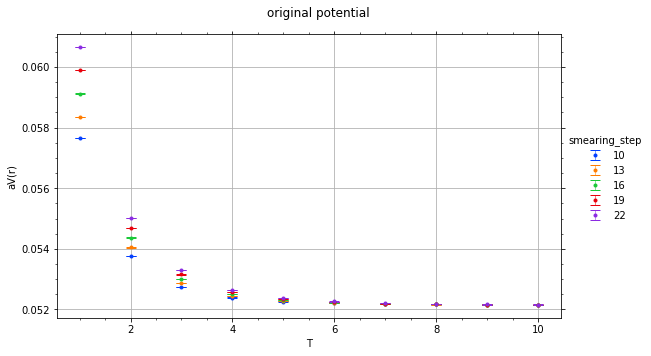

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=1


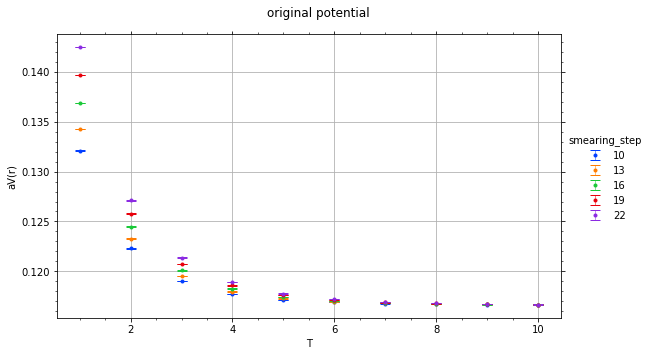

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=2


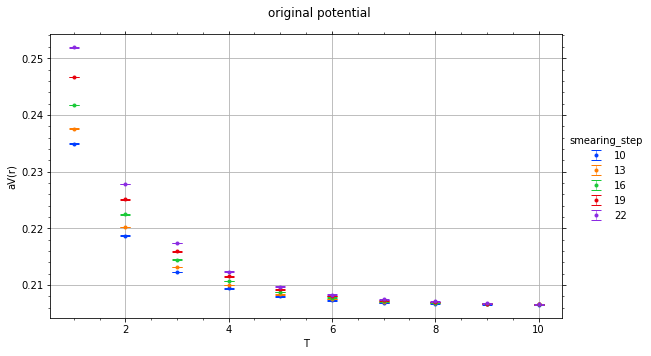

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=3


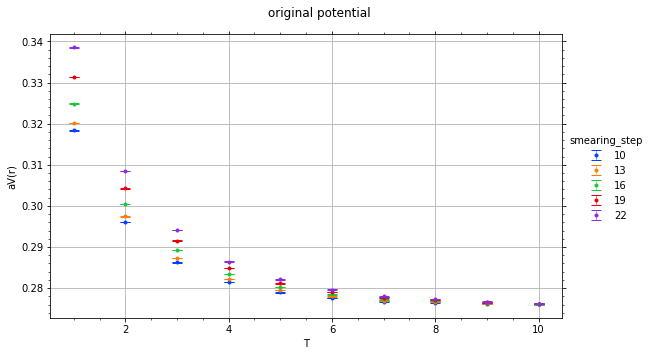

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=4


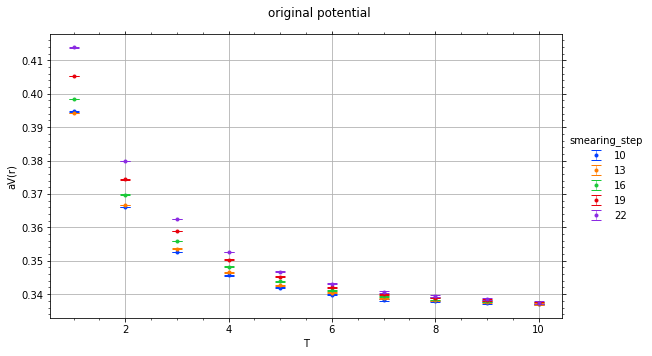

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=5


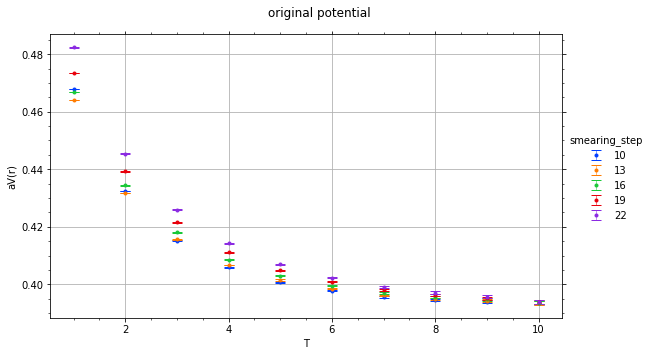

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=6


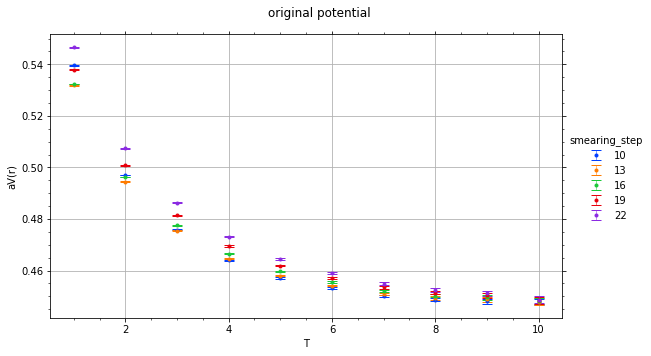

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=7


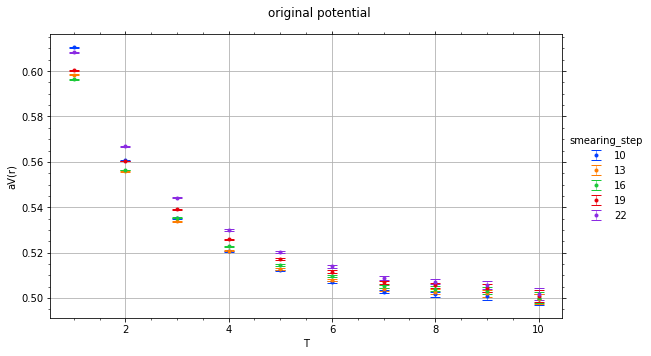

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=8


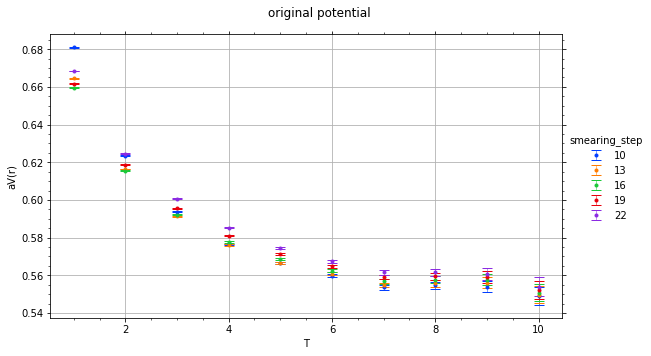

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=9


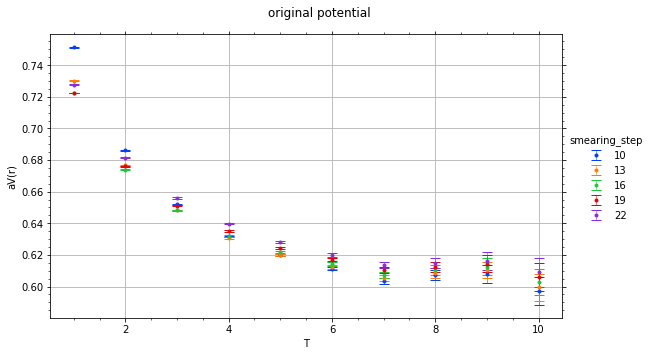

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=10


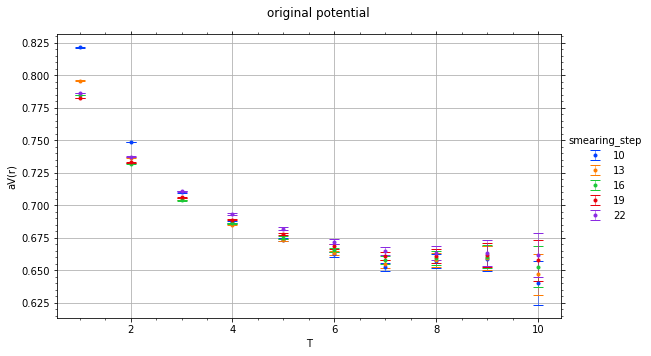

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=11


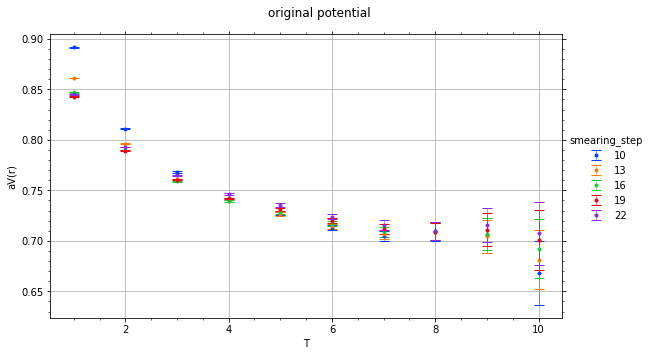

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=12


In [36]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.4/smearing/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 0.8}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
data = data[data['smearing_step'] >= 10]
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

7       no
17      no
27      no
37      no
47      no
57      no
67      no
77      no
87      no
97      no
107     no
117     no
127     no
137     no
147     no
157     no
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
Name: T_fit, dtype: object


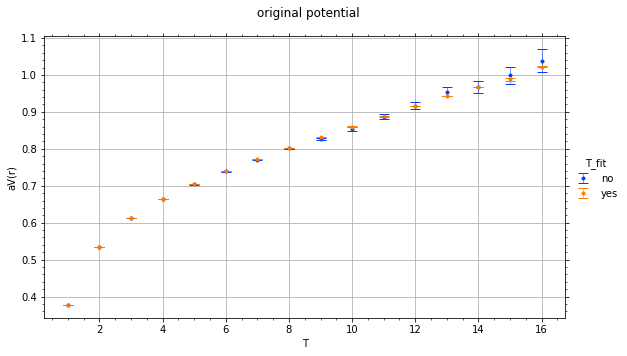

../../images/potential/su3/gluodynamics/32^3/beta6.2//potential_orignal


In [2]:
show_plot = True
coordinate = 'r/a'
hue = 'T_fit'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/32^3/beta6.2/'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
data1 = data.groupby('r/a').apply(fit.potential_fit_T, (2, 8)).reset_index(level='r/a')
data1['beta'] = data['beta']
data1['potential_type'] = data['potential_type']
data1['smearing'] = data['smearing']
data = data[data['T'] == 8]
data['T_fit'] = 'no'
data1['T_fit'] = 'yes'
data = pd.concat([data, data1])
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err')

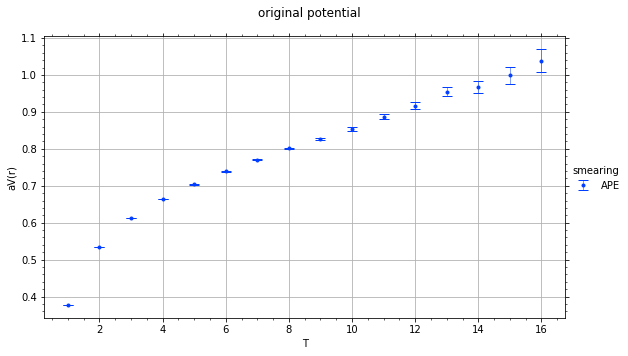

../../images/potential/su3/gluodynamics/32^3/beta6.2//potential_orignal


In [4]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 16), 'T': (8, 8)}}]
image_path = f'../../images/potential/su3/gluodynamics/32^3/beta6.2/'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err')

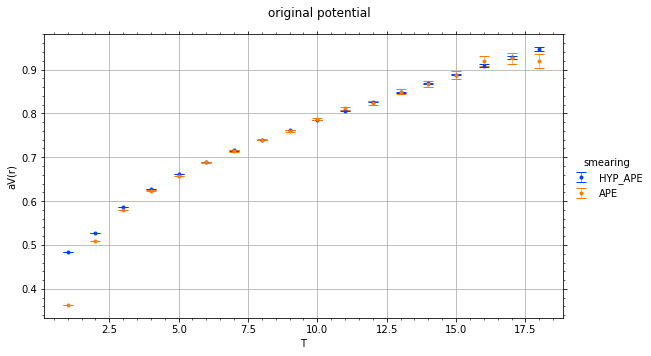

../../images/potential/su3/gluodynamics/36^4/beta6.3//potential_orignal


In [2]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.3', 'potential_type': 'original', 'smearing': 'HYP_APE'}, 'constraints': {'r/a': (1, 18), 'T': (10, 10)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.3', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 18), 'T': (8, 8)}}]
image_path = f'../../images/potential/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
data.loc[data['smearing'] == 'HYP_APE'] = potential_analyze.shift_fit(data.loc[data['smearing'] == 'HYP_APE'], data.loc[data['smearing'] == 'APE'], (5, 18), (5, 18), fit.func_linear)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err')

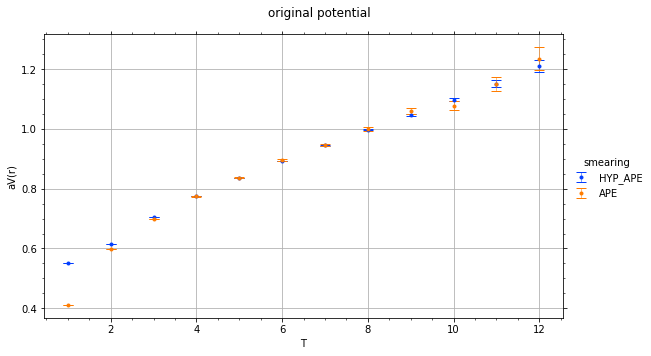

../../images/potential/su3/gluodynamics/24^4/beta6.0//potential_orignal


In [5]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 'HYP_APE'}, 'constraints': {'r/a': (1, 16), 'T': (8, 8)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 16), 'T': (6, 6)}}]
image_path = f'../../images/potential/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
data.loc[data['smearing'] == 'HYP_APE'] = potential_analyze.shift_fit(data.loc[data['smearing'] == 'HYP_APE'], data.loc[data['smearing'] == 'APE'], (5, 16), (5, 16), fit.func_linear)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err')

In [ ]:
show_plot = True
coordinate = 'T'
hue = 'r/a'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.3', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 18), 'T': (1, 12)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/T_dependence'
image_name = f'potential_monopole_'
data = potential_data.get_potantial_df(paths)
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_r={r}', show_plot, err='err')

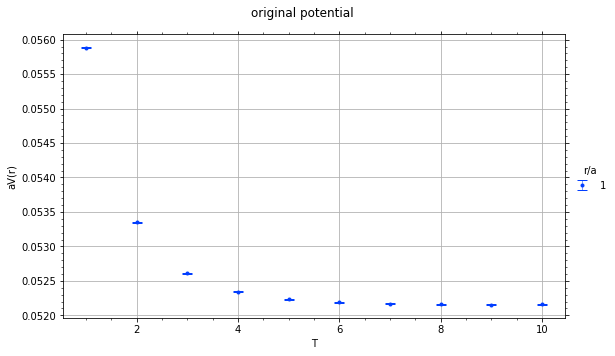

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=1


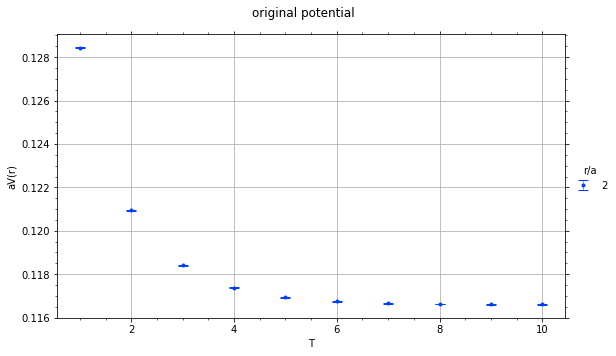

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=2


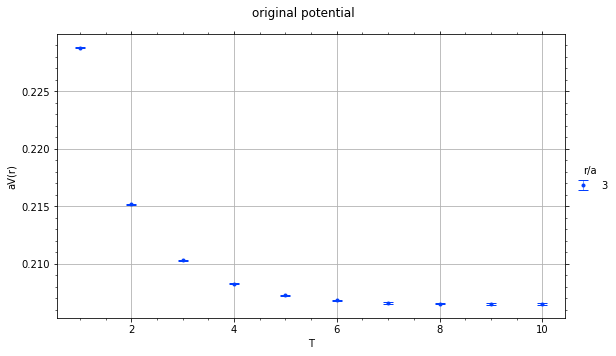

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=3


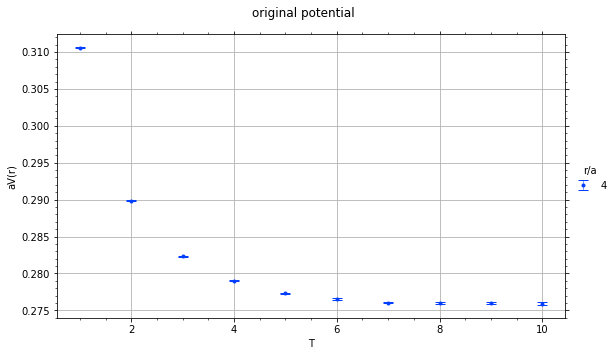

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=4


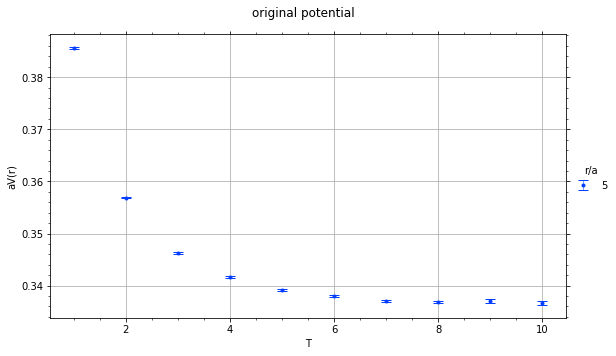

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=5


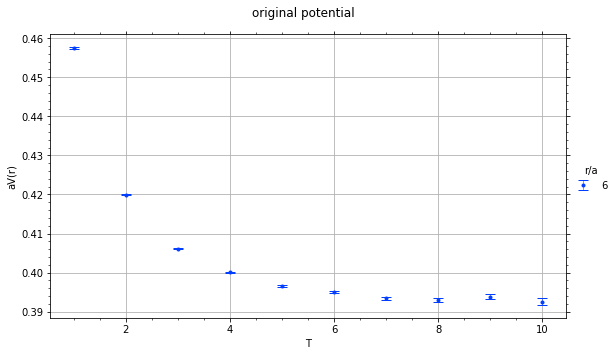

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=6


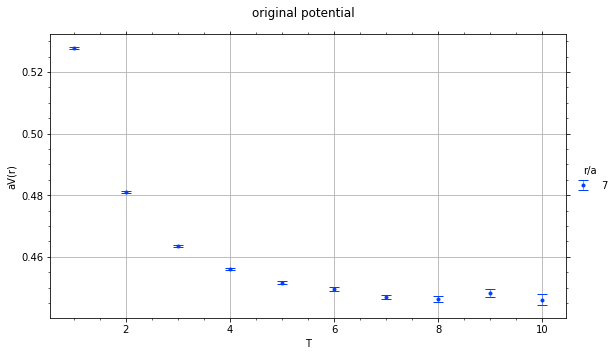

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=7


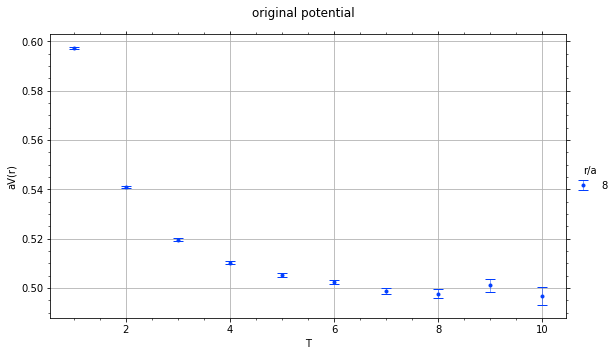

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=8


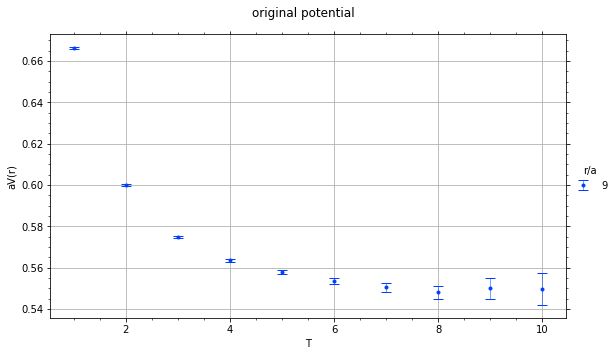

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=9


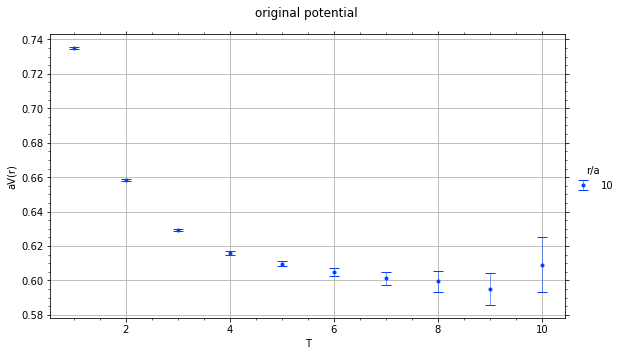

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=10


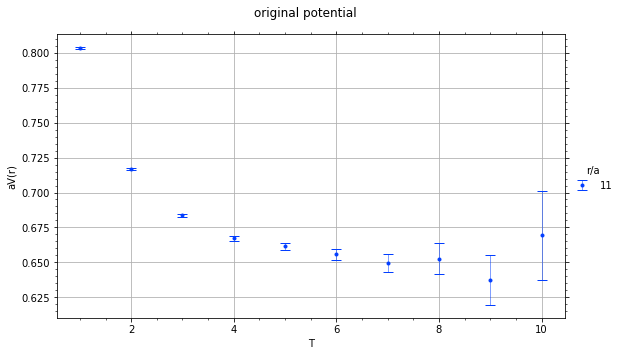

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=11


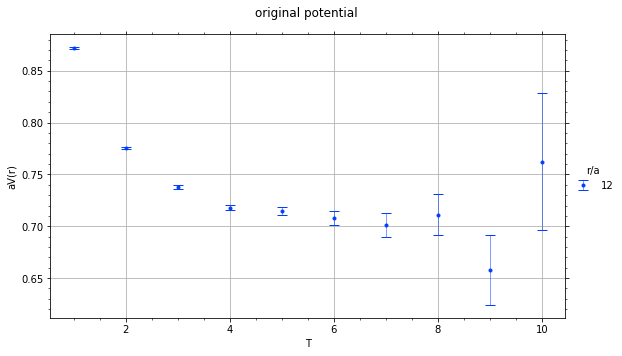

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=12


In [31]:
show_plot = True
coordinate = 'T'
hue = 'r/a'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence'
image_name = f'potential_monopole_'
data = potential_data.get_potantial_df(paths)
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_r={r}', show_plot, err='err')

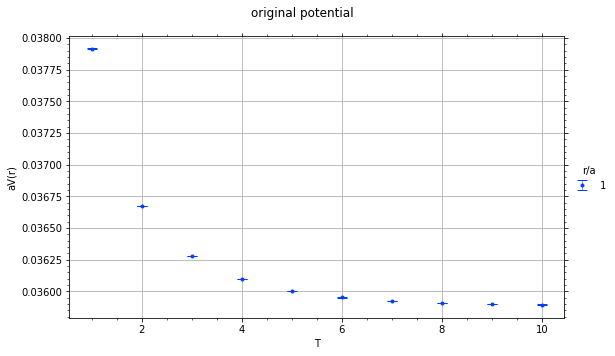

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=1


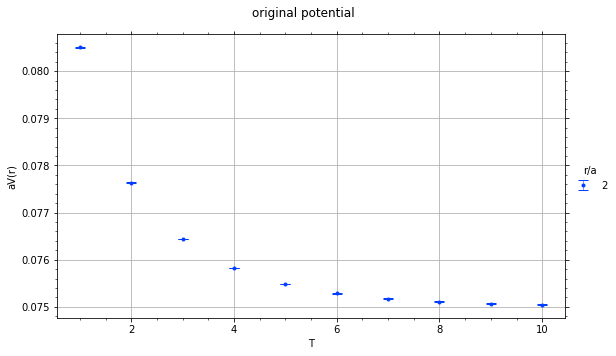

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=2


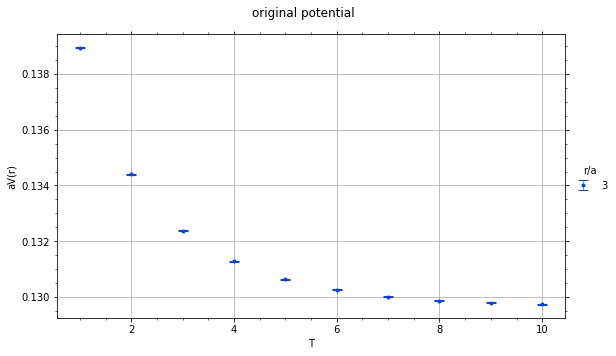

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=3


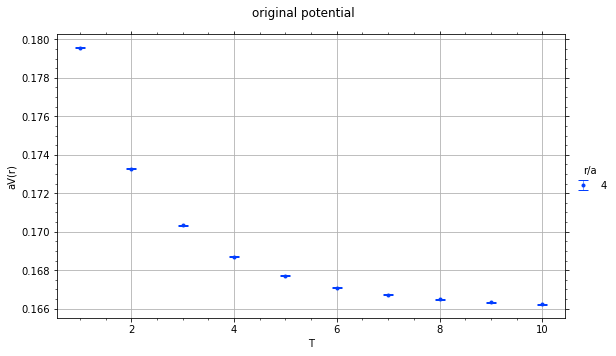

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=4


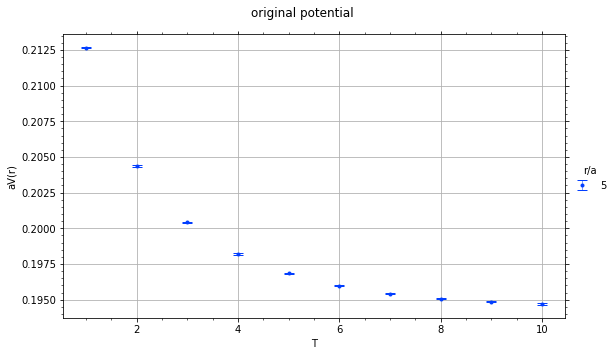

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=5


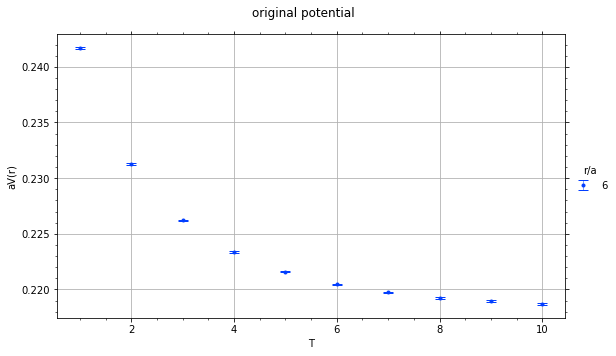

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=6


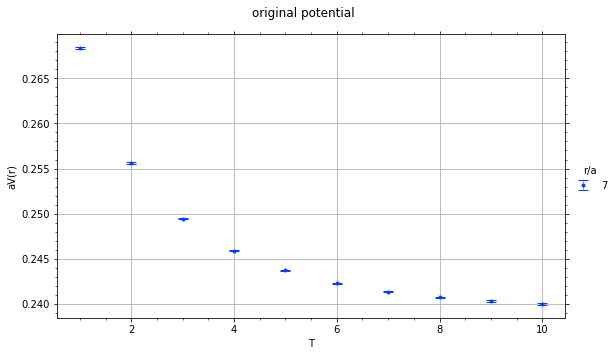

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=7


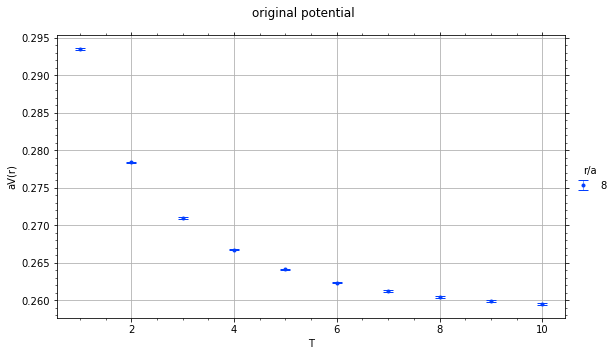

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=8


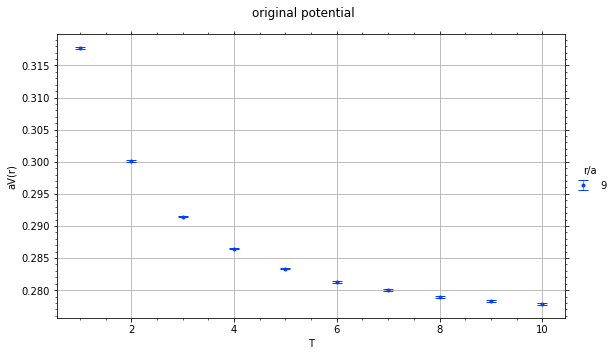

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=9


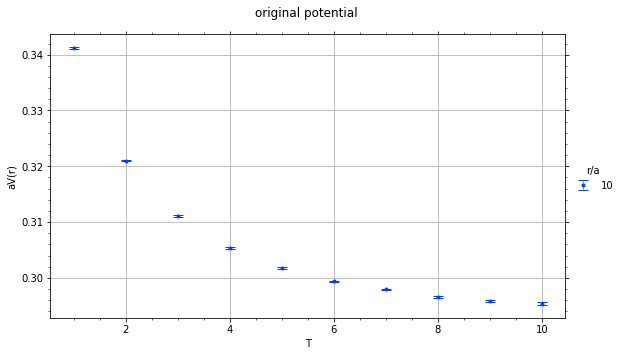

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=10


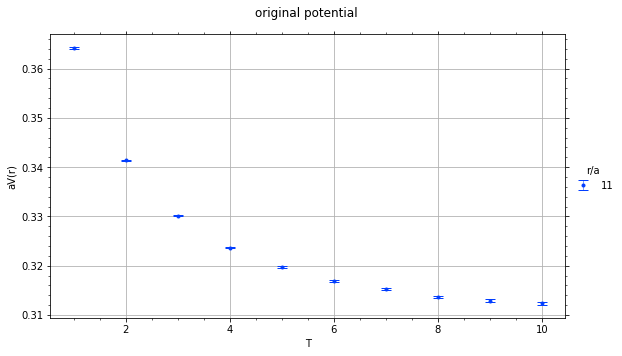

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=11


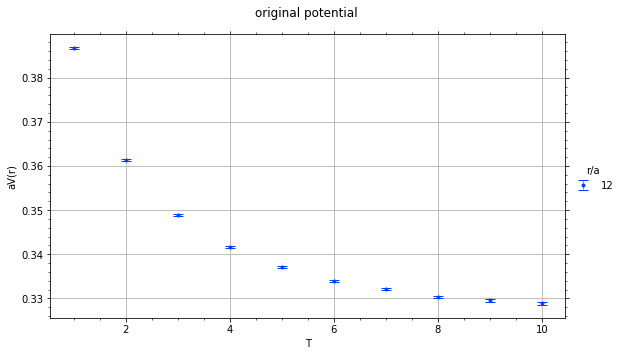

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=12


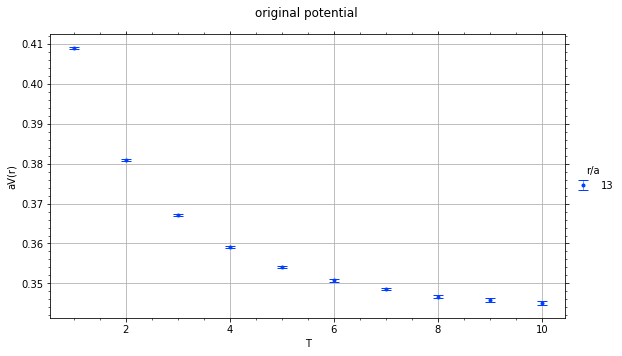

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=13


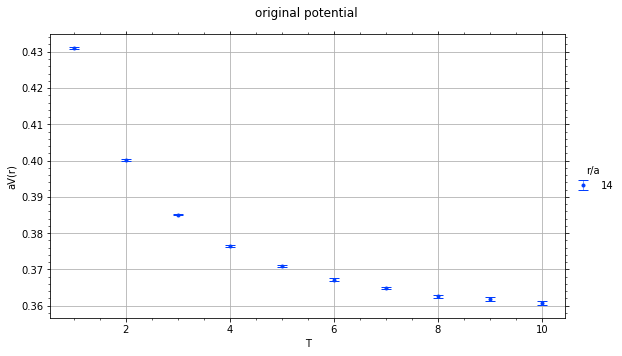

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=14


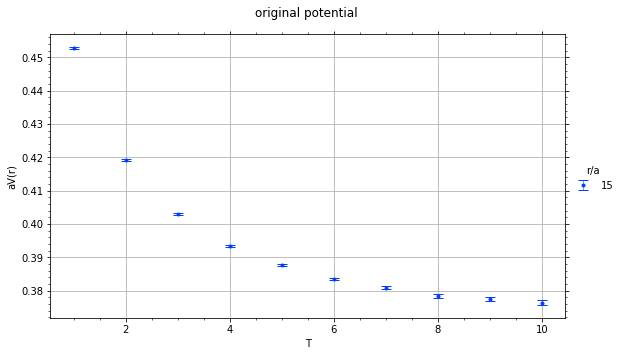

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=15


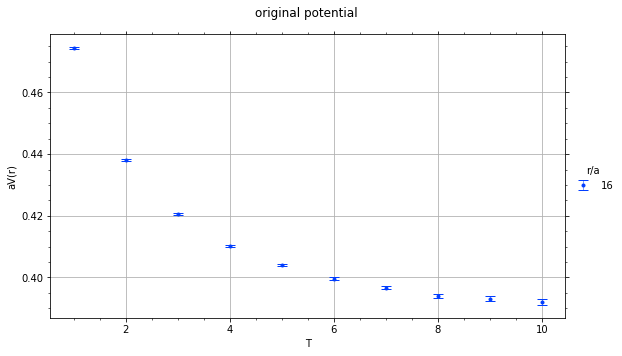

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=16


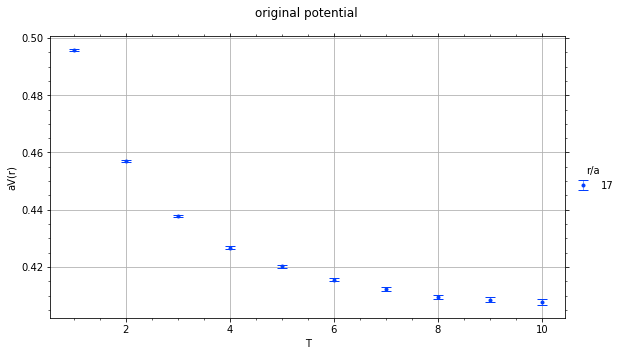

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=17


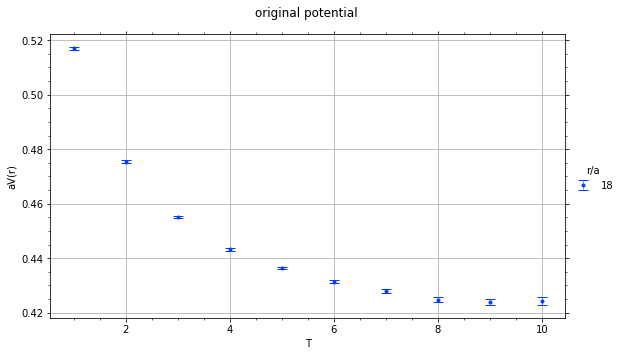

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=18


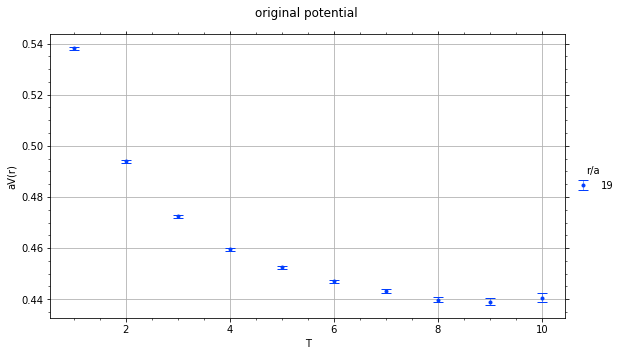

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=19


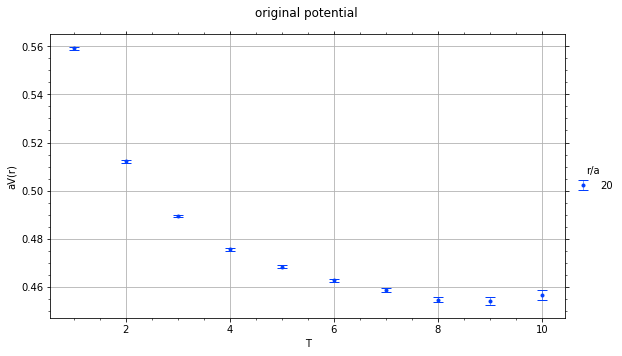

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=20


In [4]:
show_plot = True
coordinate = 'T'
hue = 'r/a'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.4/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence'
image_name = f'potential_original_'
data = potential_data.get_potantial_df(paths)
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_r={r}', show_plot, err='err')

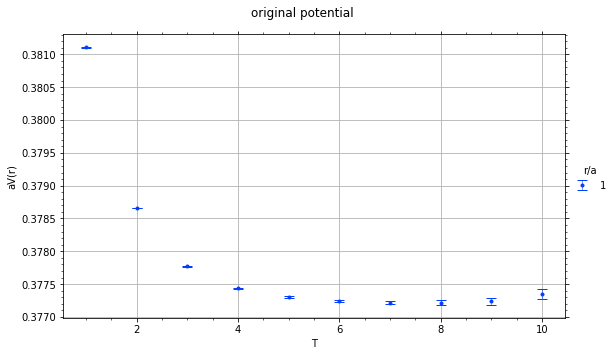

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=1


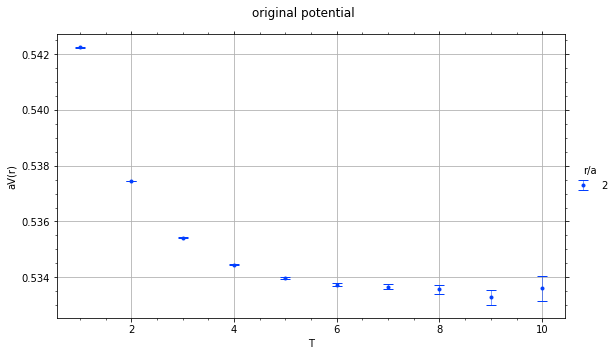

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=2


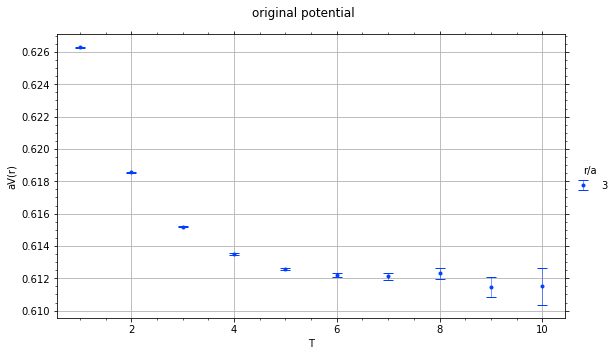

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=3


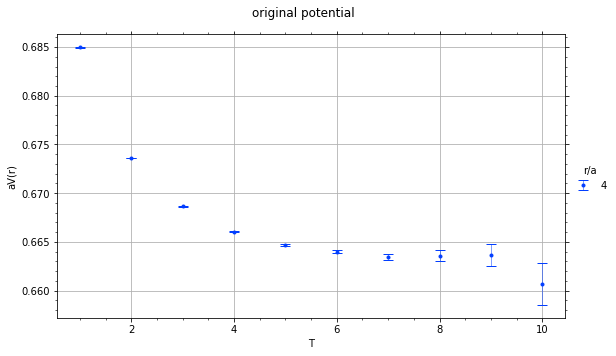

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=4


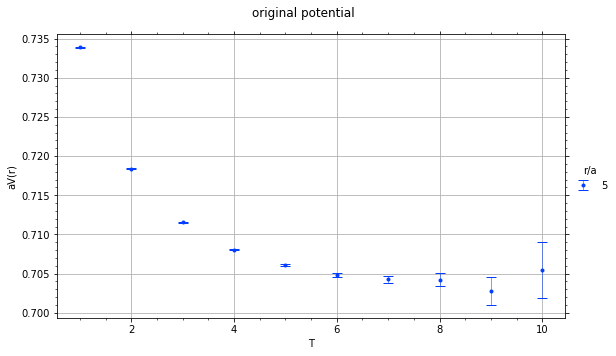

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=5


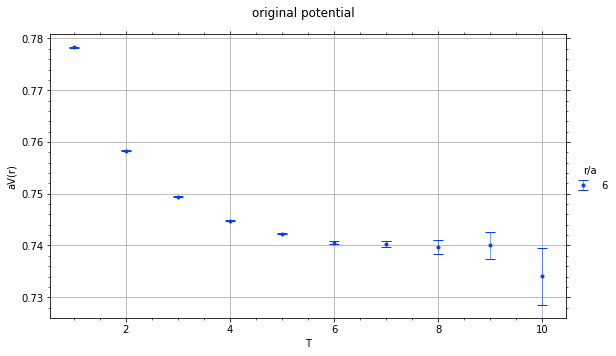

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=6


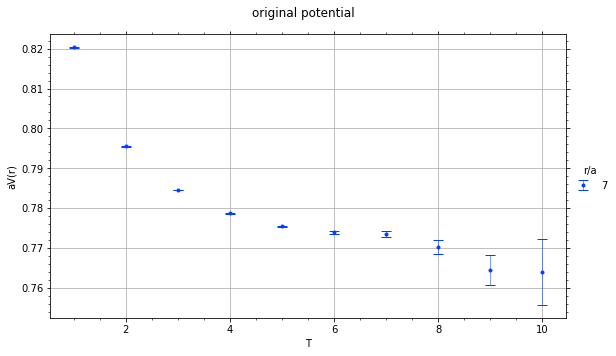

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=7


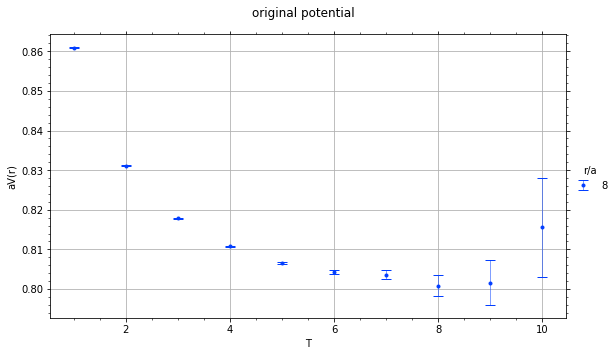

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=8


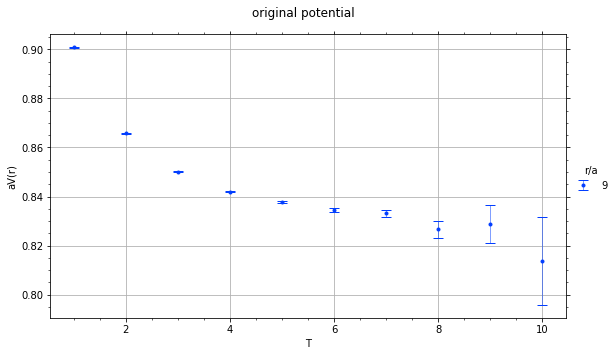

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=9


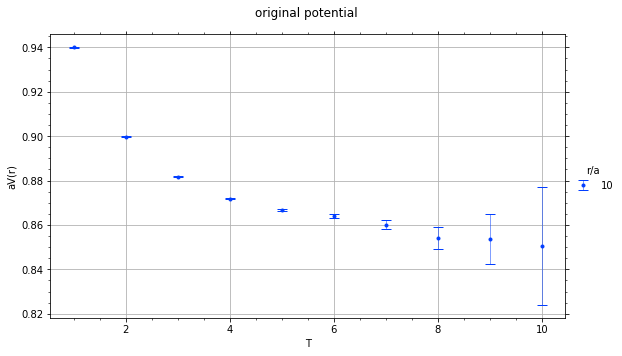

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=10


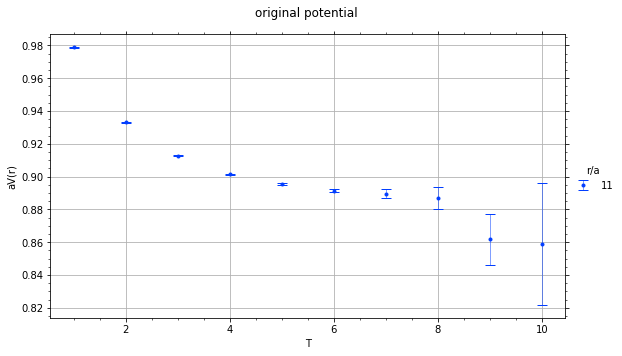

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=11


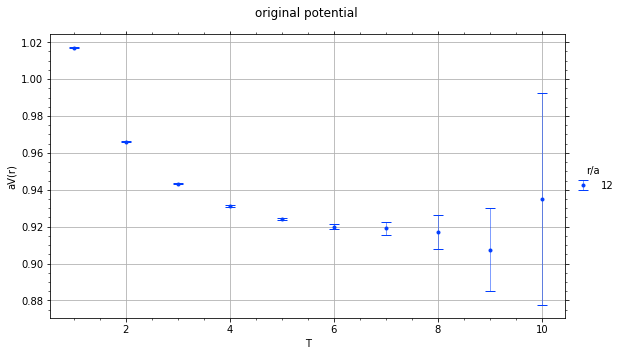

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=12


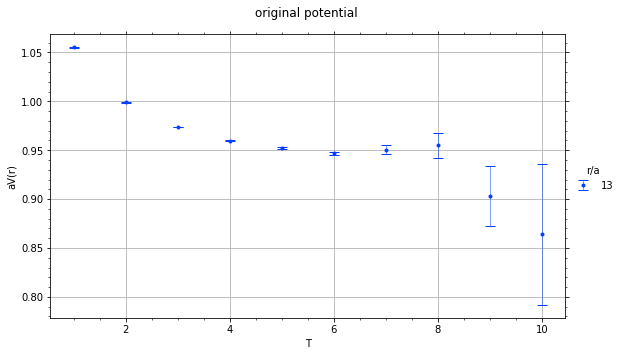

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=13


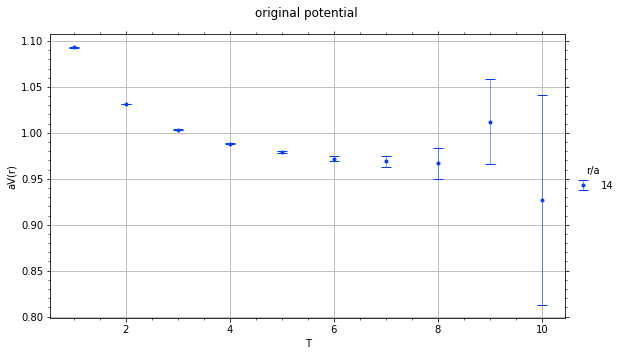

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=14


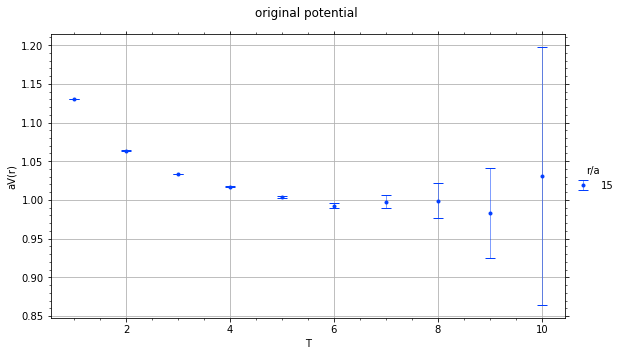

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=15


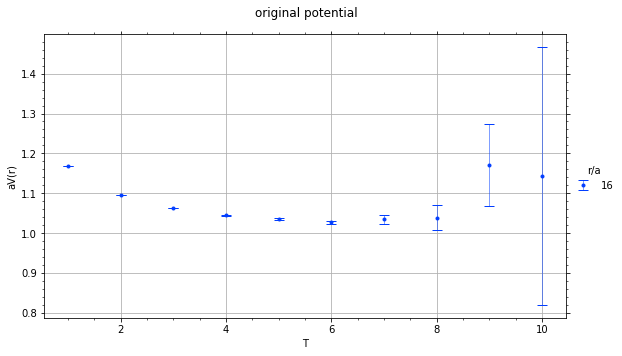

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=16


In [3]:
show_plot = True
coordinate = 'T'
hue = 'r/a'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence'
image_name = f'potential_monopole_'
data = potential_data.get_potantial_df(paths)
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_r={r}', show_plot, err='err')

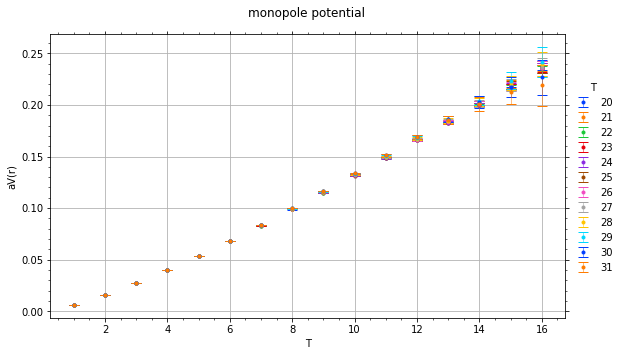

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2//potential_monopole_


In [4]:
show_plot = True
coordinate = 'r/a'
hue = 'T'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 16), 'T': (20, 31)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/'
image_name = f'potential_monopole_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole potential', image_path, image_name, show_plot, err='err')

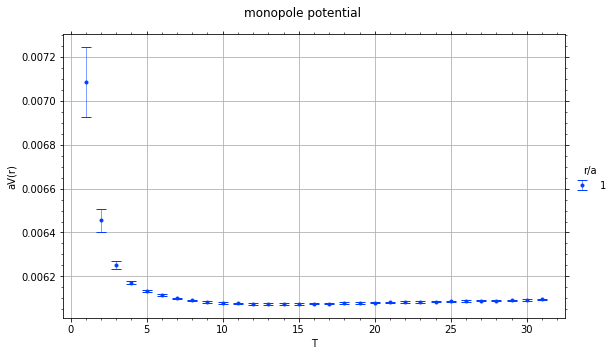

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=1


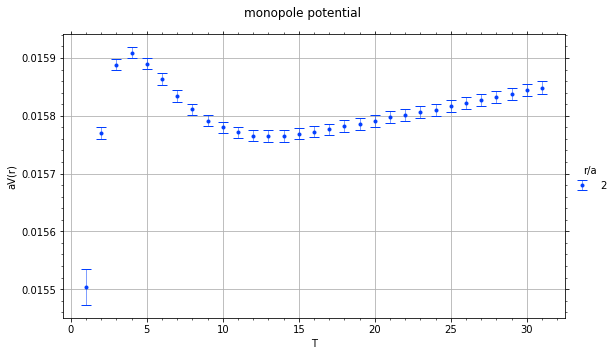

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=2


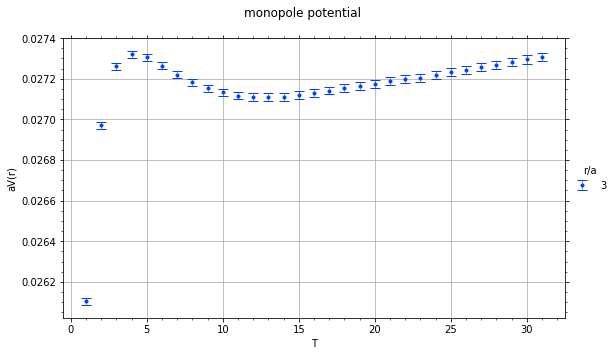

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=3


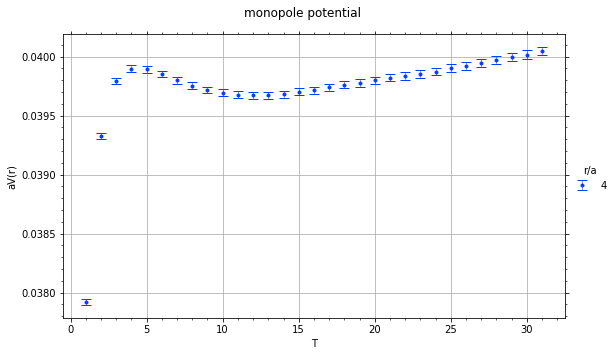

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=4


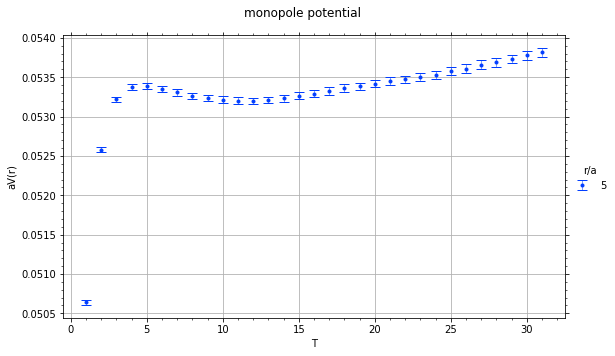

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=5


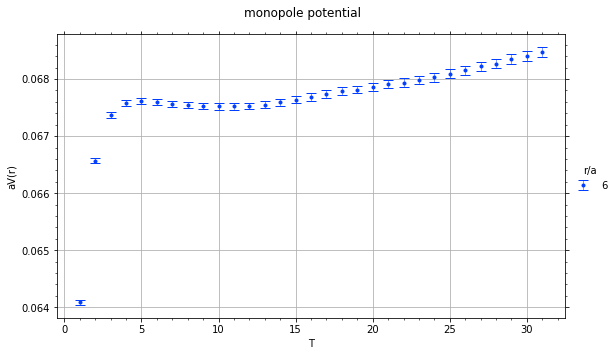

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=6


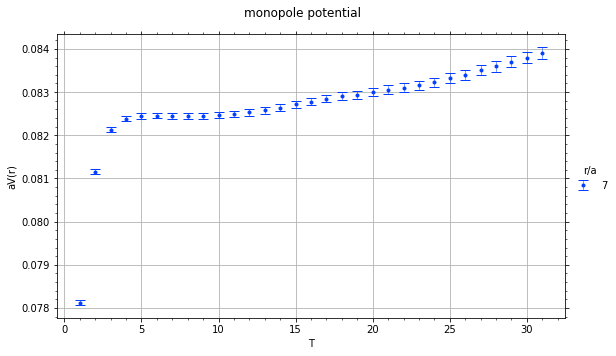

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=7


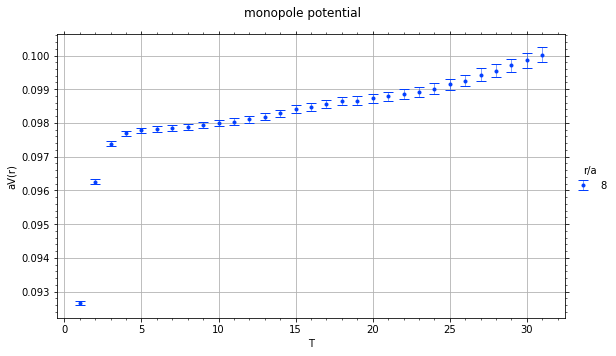

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=8


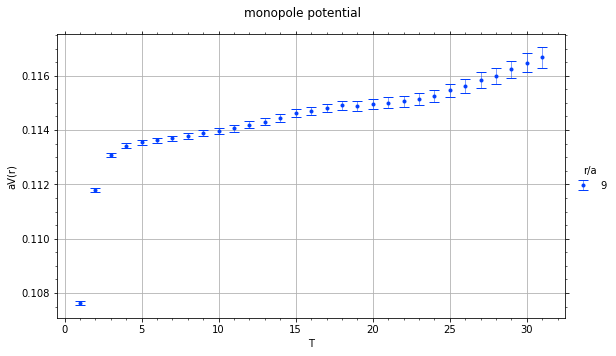

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=9


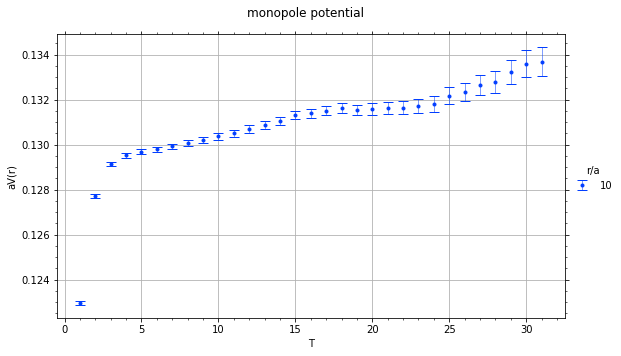

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=10


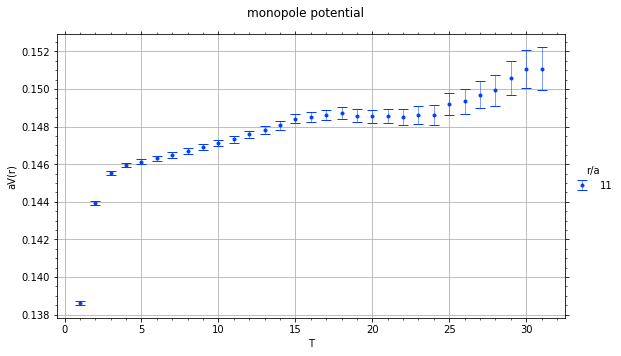

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=11


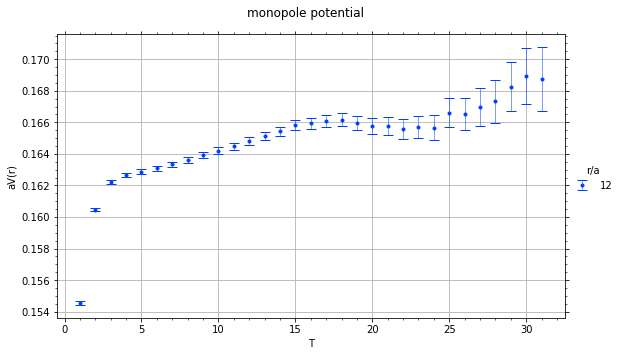

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=12


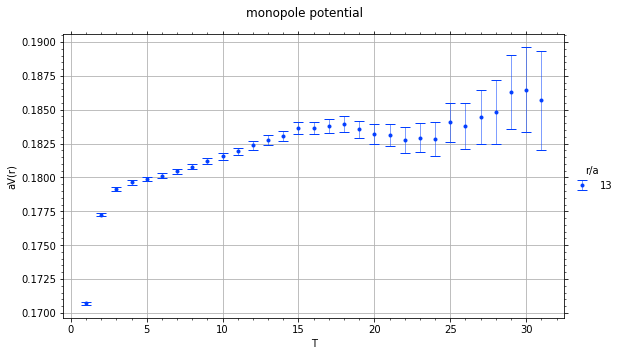

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=13


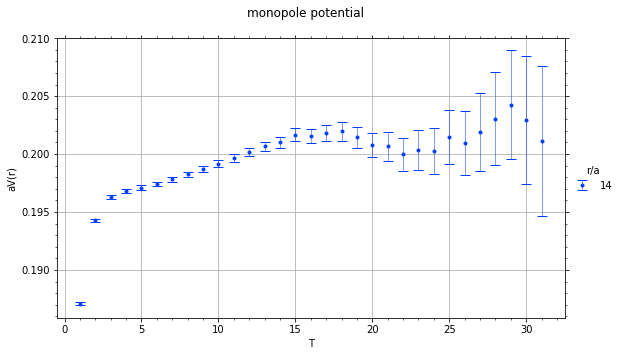

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=14


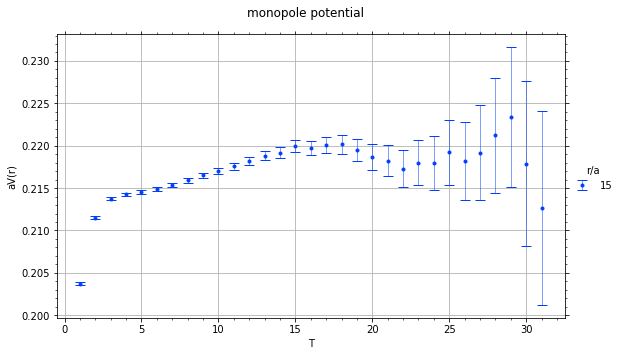

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=15


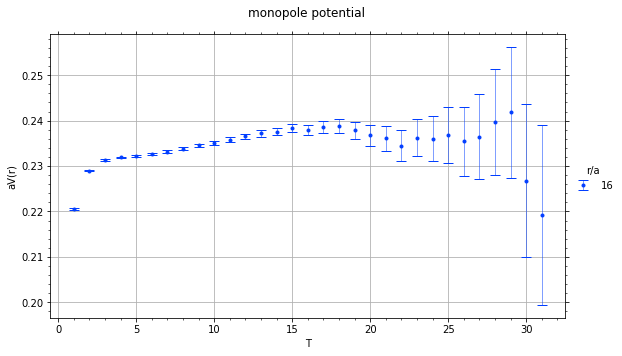

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=16


In [19]:
show_plot = True
coordinate = 'T'
hue = 'r/a'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 16), 'T': (1, 31)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence'
image_name = f'potential_monopole_'
data = potential_data.get_potantial_df(paths)
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole potential', image_path, f'potential_monopole_r={r}', show_plot, err='err')

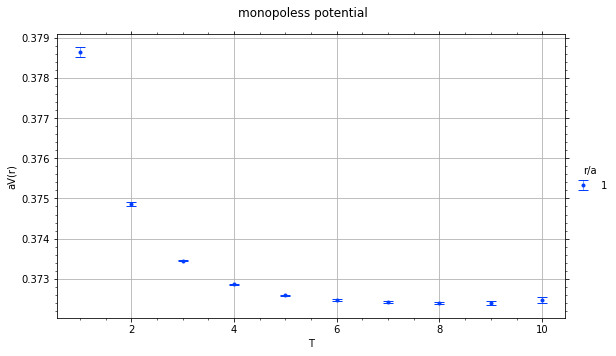

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=1


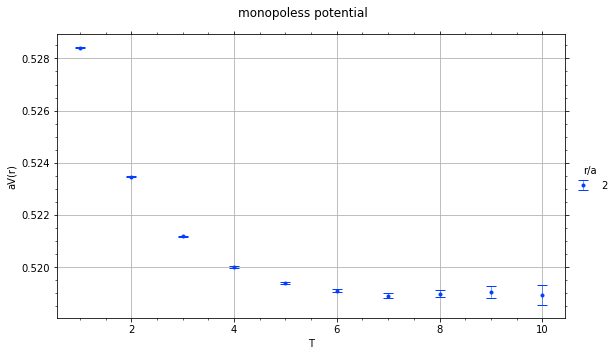

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=2


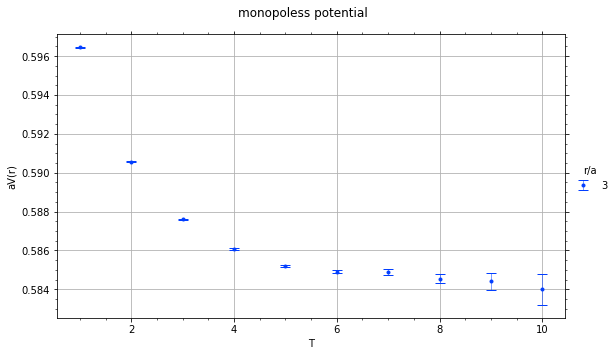

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=3


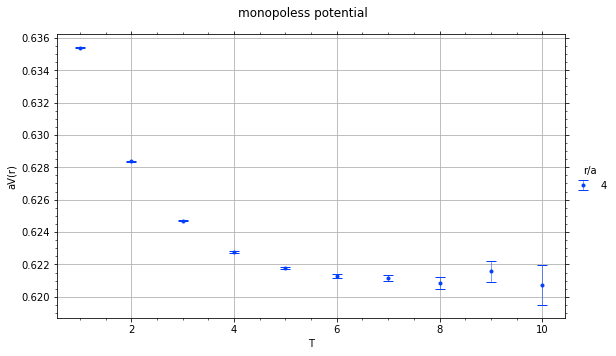

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=4


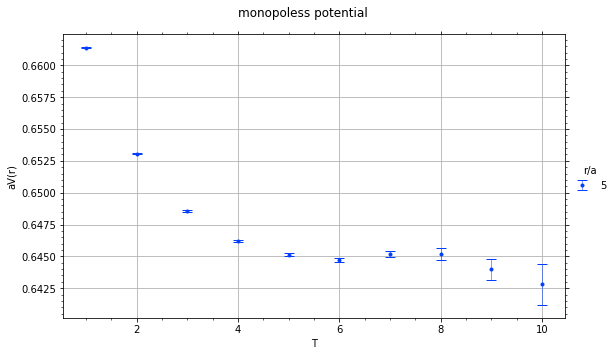

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=5


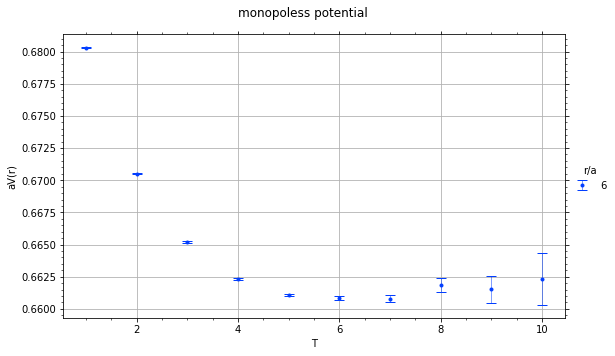

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=6


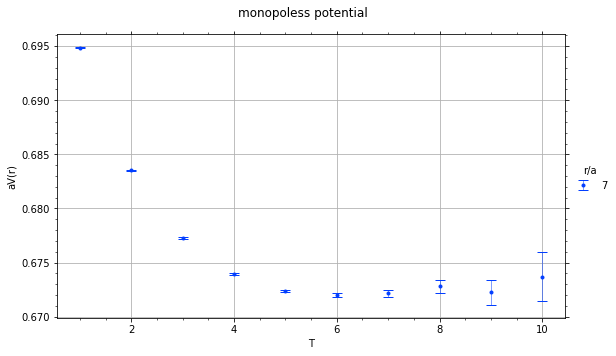

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=7


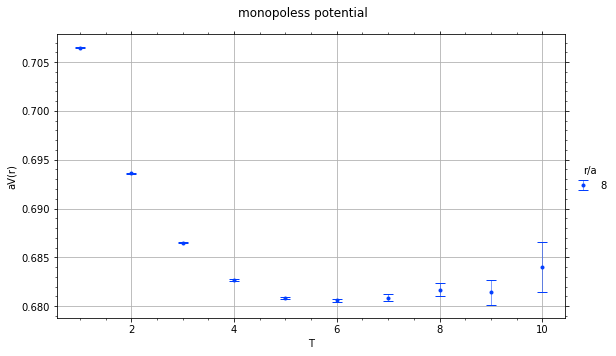

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=8


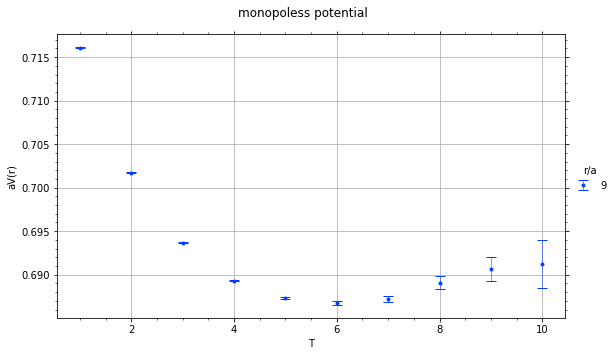

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=9


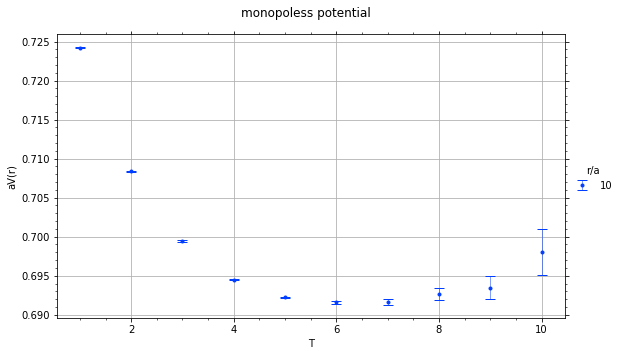

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=10


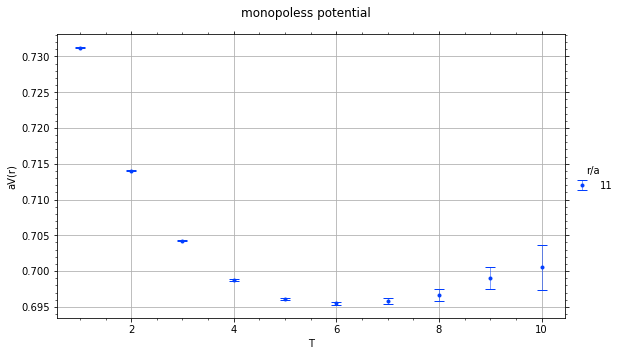

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=11


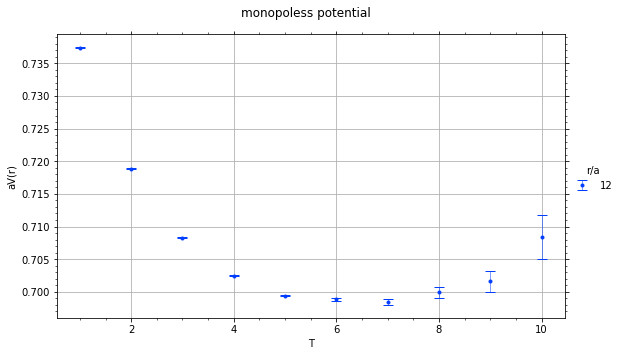

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=12


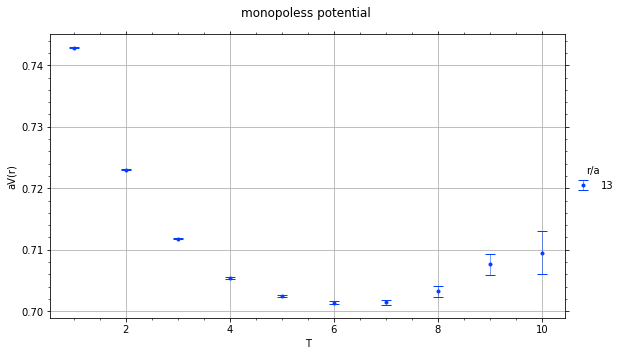

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=13


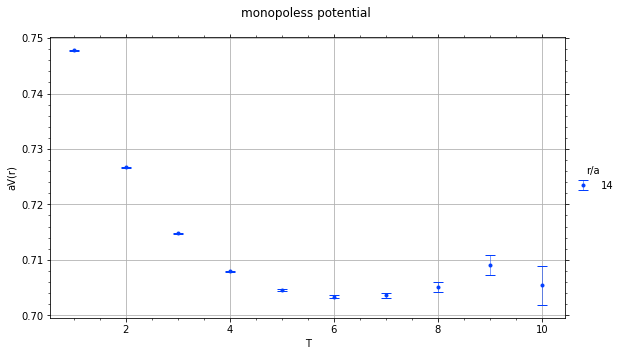

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=14


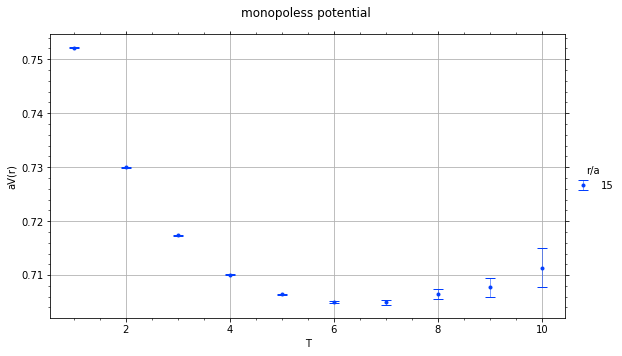

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=15


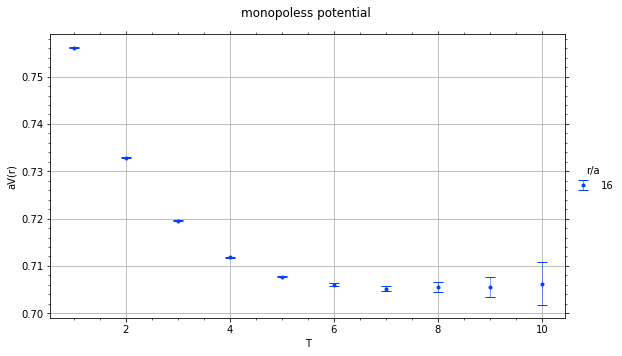

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=16


In [17]:
show_plot = True
coordinate = 'T'
hue = 'r/a'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopoless.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence'
image_name = f'potential_monopole_'
data = potential_data.get_potantial_df(paths)
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopoless potential', image_path, f'potential_monopoless_r={r}', show_plot, err='err')

    smearing_step   T  r/a     aV(r)       err projection      beta
0           420.0   1   18  0.173054  0.000328        new  beta=6.0
1           420.0   2   18  0.182883  0.000368        new  beta=6.0
2           420.0   3   18  0.186975  0.000402        new  beta=6.0
3           420.0   4   18  0.188997  0.000434        new  beta=6.0
4           420.0   5   18  0.190372  0.000473        new  beta=6.0
5           420.0   6   18  0.191536  0.000513        new  beta=6.0
6           420.0   7   18  0.192403  0.000559        new  beta=6.0
7           420.0   8   18  0.193748  0.000617        new  beta=6.0
8           420.0   9   18  0.195184  0.000681        new  beta=6.0
9           420.0  10   18  0.196321  0.000751        new  beta=6.0
10          420.0  11   18  0.197328  0.000837        new  beta=6.0
11          420.0  12   18  0.198146  0.000938        new  beta=6.0
12          420.0  13   18  0.199306  0.001069        new  beta=6.0
13          420.0  14   18  0.200267  0.001211  

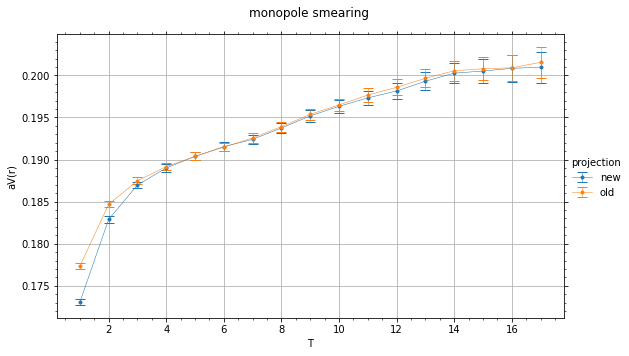

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0//potential_projection_


In [8]:
show_plot = True
coordinate = 'T'
hue = 'projection'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'projection': 'new', 'beta': 'beta=6.0'}, 'constraints': {'r/a': (18, 18), 'smearing_step': (420, 420)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'projection': 'old', 'beta': 'beta=6.0'}, 'constraints': {'r/a': (18, 18)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_projection_'
data = potential_data.get_potantial_data(paths)
print(data)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

    smearing_step   T  r/a     aV(r)       err projection      beta
0           420.0  17    1  0.003979  0.000006        new  beta=6.0
1           420.0  17    2  0.010635  0.000018        new  beta=6.0
2           420.0  17    3  0.018610  0.000034        new  beta=6.0
3           420.0  17    4  0.027556  0.000054        new  beta=6.0
4           420.0  17    5  0.037284  0.000078        new  beta=6.0
5           420.0  17    6  0.047667  0.000108        new  beta=6.0
6           420.0  17    7  0.058614  0.000143        new  beta=6.0
7           420.0  17    8  0.070053  0.000187        new  beta=6.0
8           420.0  17    9  0.081926  0.000238        new  beta=6.0
9           420.0  17   10  0.094187  0.000301        new  beta=6.0
10          420.0  17   11  0.106789  0.000378        new  beta=6.0
11          420.0  17   12  0.119696  0.000472        new  beta=6.0
12          420.0  17   13  0.132872  0.000589        new  beta=6.0
13          420.0  17   14  0.146267  0.000735  

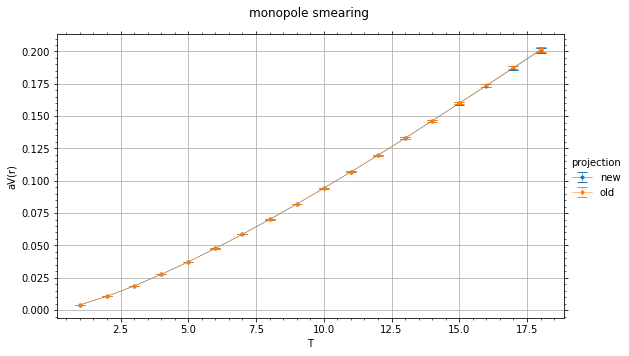

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0//potential_projection_


In [2]:
show_plot = True
coordinate = 'r/a'
hue = 'projection'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'projection': 'new', 'beta': 'beta=6.0'}, 'constraints': {'T': (17, 17), 'smearing_step': (420, 420)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'projection': 'old', 'beta': 'beta=6.0'}, 'constraints': {'T': (17, 17)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_projection_'
data = potential_data.get_potantial_data(paths)
print(data)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

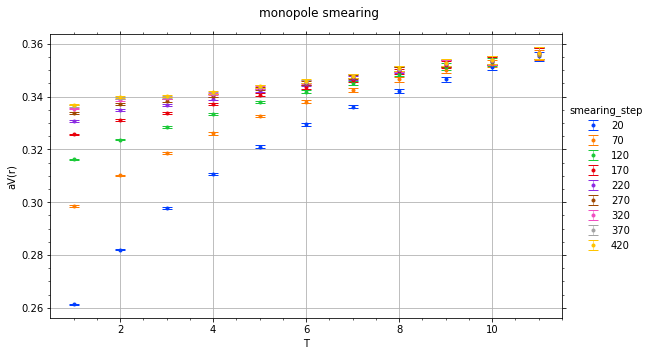

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0//potential_smearing_


In [2]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'monopole'}, 'constraints': {'r/a': (12, 12), 'T': (1, 12), 'smearing_step': (20, 420)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

In [3]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.25/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'monopole'}, 'constraints': {'r/a': (12, 12), 'T': (1, 12), 'smearing_step': (20, 820)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

FileNotFoundError: [Errno 2] No such file or directory: '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.25/steps_500/copies=4/potential_monopole.csv'

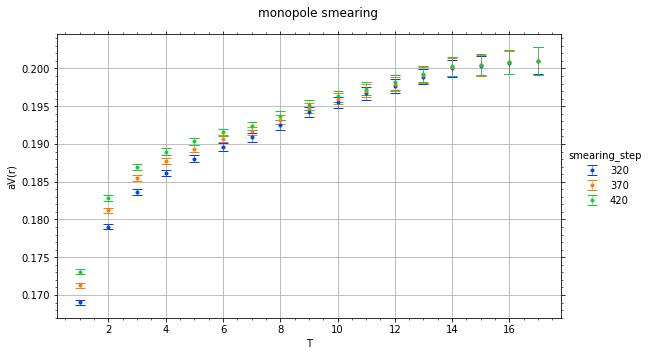

../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [10]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.3', 'potential_type': 'monopole'}, 'constraints': {'r/a': (18, 18), 'T': (1, 18), 'smearing_step': (300, 420)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

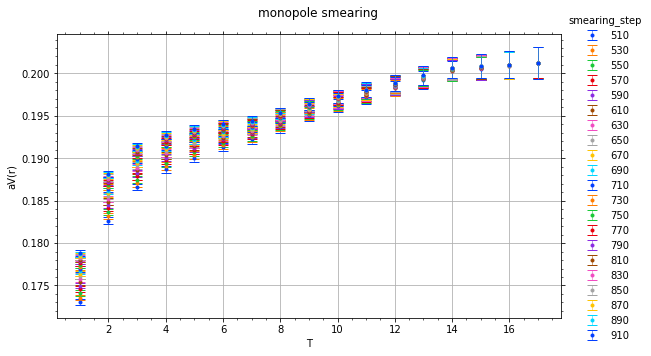

../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [9]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.25/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.3', 'potential_type': 'monopole'}, 'constraints': {'r/a': (18, 18), 'T': (1, 18), 'smearing_step': (500, 920)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

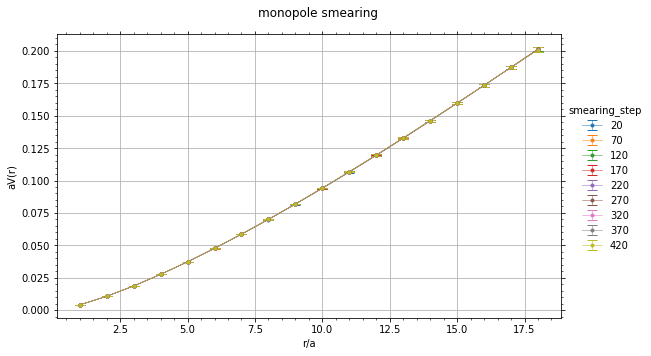

../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [8]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.3'}, 'constraints': {'r/a': (1, 18), 'T': (17, 17), 'smearing_step': (20, 420)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, coordinate, 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

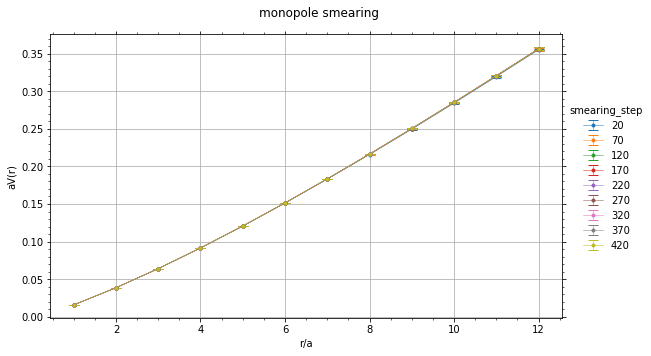

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0//potential_smearing_


In [7]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (1, 12), 'T': (11, 11), 'smearing_step': (20, 420)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, coordinate, 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

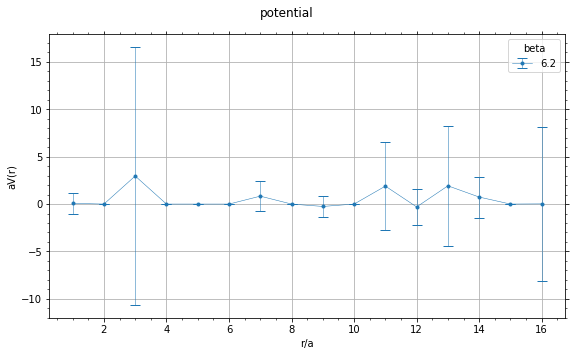

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [3]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.2}, 'constraints': {'T': (4, 4)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

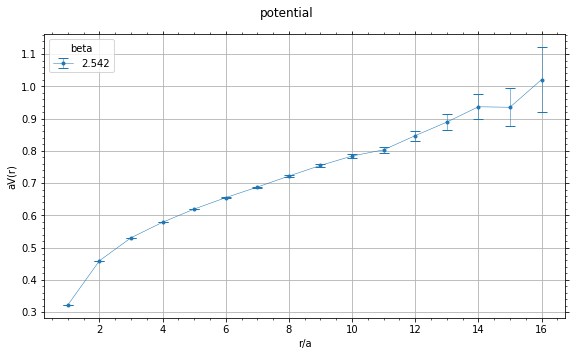

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [3]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential_original.csv',
          'parameters': {'beta': 2.542}, 'constraints': {'T': (6, 6)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

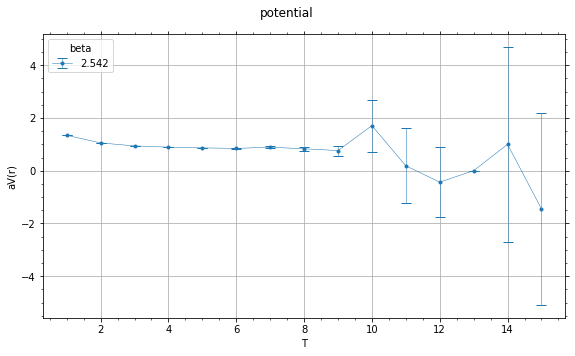

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [4]:
show_plot = True
coordinate = 'T'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential_original.csv',
          'parameters': {'beta': 2.542}, 'constraints': {'r/a': (12, 12)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

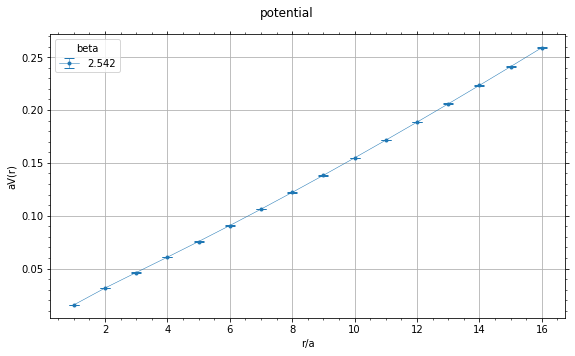

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [5]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/T_step=0.001/potential_monopole.csv',
          'parameters': {'beta': 2.542}, 'constraints': {'T': (6, 6)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

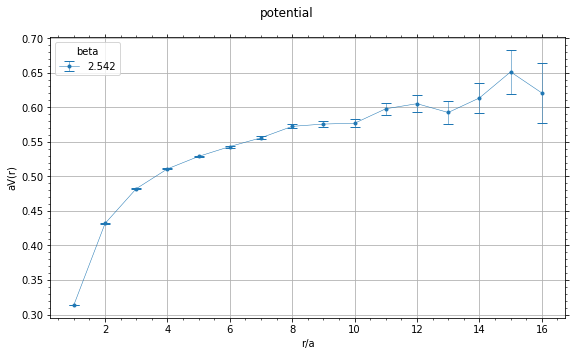

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [6]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/T_step=0.001/potential_monopoless.csv',
          'parameters': {'beta': 2.542}, 'constraints': {'T': (8, 8)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

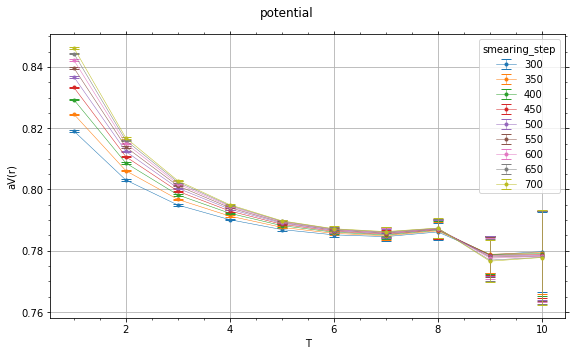

../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [2]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.3'}, 'constraints': {'r/a': (10, 10), 'T': (1, 10), 'smearing_step': (300, 700)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

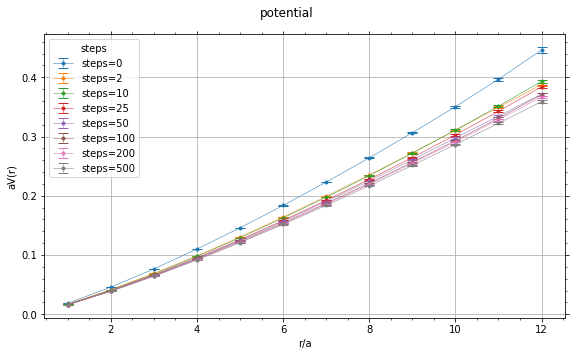

../../images/potential/test/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [21]:
show_plot = True
coordinate = 'r/a'
hue = 'steps'
groupby = []
t1 = 11
paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_0/copies=1/potential_abelian.csv',
          'parameters': {'steps': 'steps=0'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_2/copies=1/potential_abelian.csv',
          'parameters': {'steps': 'steps=2'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_10/copies=1/potential_abelian.csv',
          'parameters': {'steps': 'steps=10'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_25/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=25'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=50'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=100'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_200/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=200'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=500'}, 'constraints': {'T': (t1, t1)}}]
image_path = f'../../images/potential/test/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

In [22]:
show_plot = True
coordinate = 'r/a'
hue = 'steps'
groupby = []
t1 = 11
paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_25/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=25'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=2/potential_abelian.csv',
          'parameters': {'steps': 'steps=50_2'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=50_4'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=1/potential_abelian.csv',
          'parameters': {'steps': 'steps=100_1'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=2/potential_abelian.csv',
          'parameters': {'steps': 'steps=100_2'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=100_4'}, 'constraints': {'T': (t1, t1)}}]
image_path = f'../../images/potential/test/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

FileNotFoundError: [Errno 2] No such file or directory: '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=2/potential_abelian.csv'

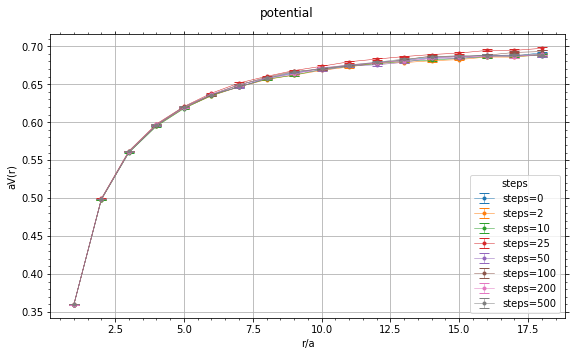

../../images/potential/test/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [7]:
show_plot = True
coordinate = 'r/a'
hue = 'steps'
groupby = []
t1 = 8
potential_name = 'monopoless'
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_0/copies=1/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=0'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_2/copies=1/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=2'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_10/copies=1/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=10'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_25/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=25'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=50'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=100'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_200/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=200'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=500'}, 'constraints': {'T': (t1, t1)}}]
image_path = f'../../images/potential/test/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

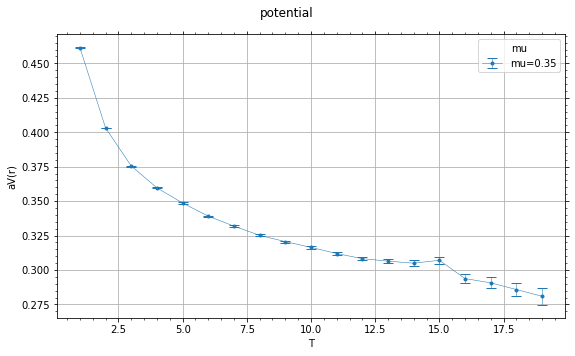

../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.35/comparison/potential


In [4]:
show_plot = True
coordinate = 'T'
hue = 'mu'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/su2/qc2dstag/40^4/mu0.35/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'mu': 'mu=0.35'}, 'constraints': {'r/a': (10, 10)}}]
image_path = f'../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.35/comparison'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

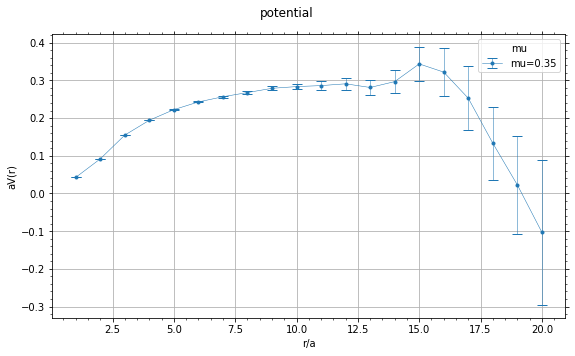

../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.35/comparison/potential


In [5]:
show_plot = True
coordinate = 'r/a'
hue = 'mu'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/su2/qc2dstag/40^4/mu0.35/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original1.csv',
          'parameters': {'mu': 'mu=0.35'}, 'constraints': {'T': (19, 19), 'r/a': (0, 20)}}]
image_path = f'../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.35/comparison'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

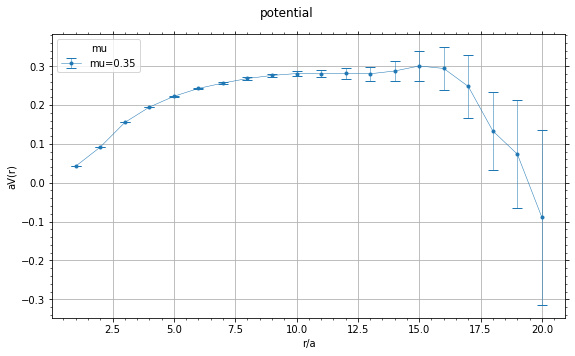

../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.35/comparison/potential


In [6]:
show_plot = True
coordinate = 'r/a'
hue = 'mu'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/su2/qc2dstag/40^4/mu0.35/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'mu': 'mu=0.35'}, 'constraints': {'T': (19, 19), 'r/a': (0, 20)}}]
image_path = f'../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.35/comparison'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)